### Auteur : Ousmane Tom BECHIR
## Partie 2 – Clustering
#### Préliminaire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("../data/data_cleaned.csv", low_memory=False)
df.head()

player_id     version                              name  height_cm  \
0     231866  2025-06-03                           Rodri -        190   
1     209331  2025-06-03       Mohamed Salah Hamed Ghaly -        175   
2     252371  2025-06-03  Jude Victor William Bellingham -        186   
3     239085  2025-06-03             Erling Braut Håland -        195   
4     238794  2025-06-03                        Vini Jr. -        176   

   weight_kg         dob positions  overall_rating  potential    value  ...  \
0         82  1996-06-22    CDM,CM              91         91  €115.5M  ...   
1         72  1992-06-15     RM,RW              91         91    €104M  ...   
2         75  2003-06-29    CAM,CM              90         94  €174.5M  ...   
3         94  2000-07-21        ST              90         92    €157M  ...   
4         73  2000-07-12     LW,ST              90         94  €171.5M  ...   

         age groupe_age        IMC  club_position_cat  country_position_cat  \
0  28.947945      25-30  22.714681                SUB                   SUB   
1  32.967123      30-35  23.510204                MID                   NaN   
2  21.928767      20-25  21.678807                MID                   MID   
3  24.868493      20-25  24.720579                SUB                   FWD   
4  24.893151      20-25  23.566632                FWD                   NaN   

  wage_clean wage_cat    value_num value_cat duree_contrat  
0        440    elite  115500000.0     elite           2.0  
1        350    elite  104000000.0     elite           2.0  
2        280    elite  174500000.0     elite           4.0  
3        270    elite  157000000.0     elite           9.0  
4        340    elite  171500000.0     elite           2.0  

[5 rows x 93 columns]

#### Data preprocessing
Nous allons préparer les données conformement à ce qui est démander. Nous allons exclure les gardiens de but, et considererons uniquement les variables numériques à l'exception de `Player Value, Wage et Overall Rating`. Nous transformerons les colonnes catégorielles en numérique en utilisant un encodage ordinal pour les colonnes `wage_cat` et `value_cat` et un encodage one-hot encoding pour les colonnes `club_position_cat` et `country_position_cat`.

In [3]:
df.wage_cat.unique()

array(['elite', 'high', 'low', 'very low', 'medium'], dtype=object)

In [4]:
encoder_wage = OrdinalEncoder(categories=[['very low', 'low', 'medium', 'high', 'elite']])
encoder_value = OrdinalEncoder(categories=[['very low', 'low', 'medium', 'high', 'elite']])

df['wage_cat_encoded'] = encoder_wage.fit_transform(df[['wage_cat']])
df['value_cat_encoded'] = encoder_value.fit_transform(df[['value_cat']])
df[['wage_cat_encoded', 'value_cat_encoded']]

wage_cat_encoded  value_cat_encoded
0                   4.0                4.0
1                   4.0                4.0
2                   4.0                4.0
3                   4.0                4.0
4                   4.0                4.0
...                 ...                ...
18200               0.0                0.0
18201               0.0                0.0
18202               1.0                0.0
18203               0.0                0.0
18204               0.0                0.0

[18205 rows x 2 columns]

In [5]:
df_encoded = pd.get_dummies(df, columns=['club_position_cat', 'country_position_cat'],dtype=float)
df_encoded.head()

player_id     version                              name  height_cm  \
0     231866  2025-06-03                           Rodri -        190   
1     209331  2025-06-03       Mohamed Salah Hamed Ghaly -        175   
2     252371  2025-06-03  Jude Victor William Bellingham -        186   
3     239085  2025-06-03             Erling Braut Håland -        195   
4     238794  2025-06-03                        Vini Jr. -        176   

   weight_kg         dob positions  overall_rating  potential    value  ...  \
0         82  1996-06-22    CDM,CM              91         91  €115.5M  ...   
1         72  1992-06-15     RM,RW              91         91    €104M  ...   
2         75  2003-06-29    CAM,CM              90         94  €174.5M  ...   
3         94  2000-07-21        ST              90         92    €157M  ...   
4         73  2000-07-12     LW,ST              90         94  €171.5M  ...   

  club_position_cat_DEF club_position_cat_FWD club_position_cat_GK  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0.0                   1.0                  0.0   

   club_position_cat_MID  club_position_cat_SUB country_position_cat_DEF  \
0                    0.0                    1.0                      0.0   
1                    1.0                    0.0                      0.0   
2                    1.0                    0.0                      0.0   
3                    0.0                    1.0                      0.0   
4                    0.0                    0.0                      0.0   

  country_position_cat_FWD country_position_cat_GK country_position_cat_MID  \
0                      0.0                     0.0                      0.0   
1                      0.0                     0.0                      0.0   
2                      0.0                     0.0                      1.0   
3                      1.0                     0.0                      0.0   
4                      0.0                     0.0                      0.0   

  country_position_cat_SUB  
0                      1.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 103 columns]

In [6]:
# Suppression de gardient de buts 
is_gk = df_encoded['club_position_cat_GK'].astype('bool') | df_encoded['country_position_cat_GK'].astype('bool')
df_encoded.drop(df_encoded[is_gk].index, inplace=True)

In [7]:
(df_encoded['club_position_cat_GK'].astype('bool') | df_encoded['country_position_cat_GK'].astype('bool')).sum()

np.int64(0)

In [8]:
# Suppréssion des colonnes Player Value, Wage et Overall Rating
col_to_drop = ['wage', 'wage_cat', 'wage_clean', 'value', 'value_cat', 'value_num', 'overall_rating']
df_encoded.drop(columns=col_to_drop, axis=1, inplace=True)

# Nous supprimons aussi les colonnes club_position_cat_GK et country_position_cat_GK
df_encoded.drop(columns=['club_position_cat_GK', 'country_position_cat_GK'], inplace=True)

Nous allons supprimer les colonnes non numérique

In [9]:
df_encoded_num = df_encoded.select_dtypes(include=np.number)
df_encoded_num.head()

player_id  height_cm  weight_kg  potential  skill_moves  \
0     231866        190         82         91            3   
1     209331        175         72         91            4   
2     252371        186         75         94            4   
3     239085        195         94         92            3   
4     238794        176         73         94            5   

   international_reputation  club_id  club_league_id  club_rating  \
0                       5.0     10.0            13.0         85.0   
1                       5.0      9.0            13.0         84.0   
2                       5.0    243.0            53.0         85.0   
3                       5.0     10.0            13.0         85.0   
4                       5.0    243.0            53.0         85.0   

   club_kit_number  ...  wage_cat_encoded  value_cat_encoded  \
0             16.0  ...               4.0                4.0   
1             11.0  ...               4.0                4.0   
2              5.0  ...               4.0                4.0   
3              9.0  ...               4.0                4.0   
4              7.0  ...               4.0                4.0   

   club_position_cat_DEF  club_position_cat_FWD  club_position_cat_MID  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    1.0   
2                    0.0                    0.0                    1.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    1.0                    0.0   

   club_position_cat_SUB  country_position_cat_DEF  country_position_cat_FWD  \
0                    1.0                       0.0                       0.0   
1                    0.0                       0.0                       0.0   
2                    0.0                       0.0                       0.0   
3                    1.0                       0.0                       1.0   
4                    0.0                       0.0                       0.0   

   country_position_cat_MID  country_position_cat_SUB  
0                       0.0                       1.0  
1                       0.0                       0.0  
2                       1.0                       0.0  
3                       0.0                       0.0  
4                       0.0                       0.0  

[5 rows x 73 columns]

In [10]:
df_encoded_num.shape

(17540, 73)

#### Traitement des valeurs manquantes

In [11]:
missing_ratio = df_encoded_num.isna().mean()
len(missing_ratio[missing_ratio > 0.80])

37

Nous avons 37 colonnes avec plus de 80% de valeur manquantes. Nous décidons donc des les supprimer avant de faire une imputation sur le reste. Le fais de supprimer ces colonnes avant, nous évitera d'introduire trop d'incohérence lors de l'imputation. 

In [12]:
df_encoded_num.drop(columns=missing_ratio[missing_ratio > 0.80].index, inplace=True)

##### Analyse de valeurs manquantes restantes

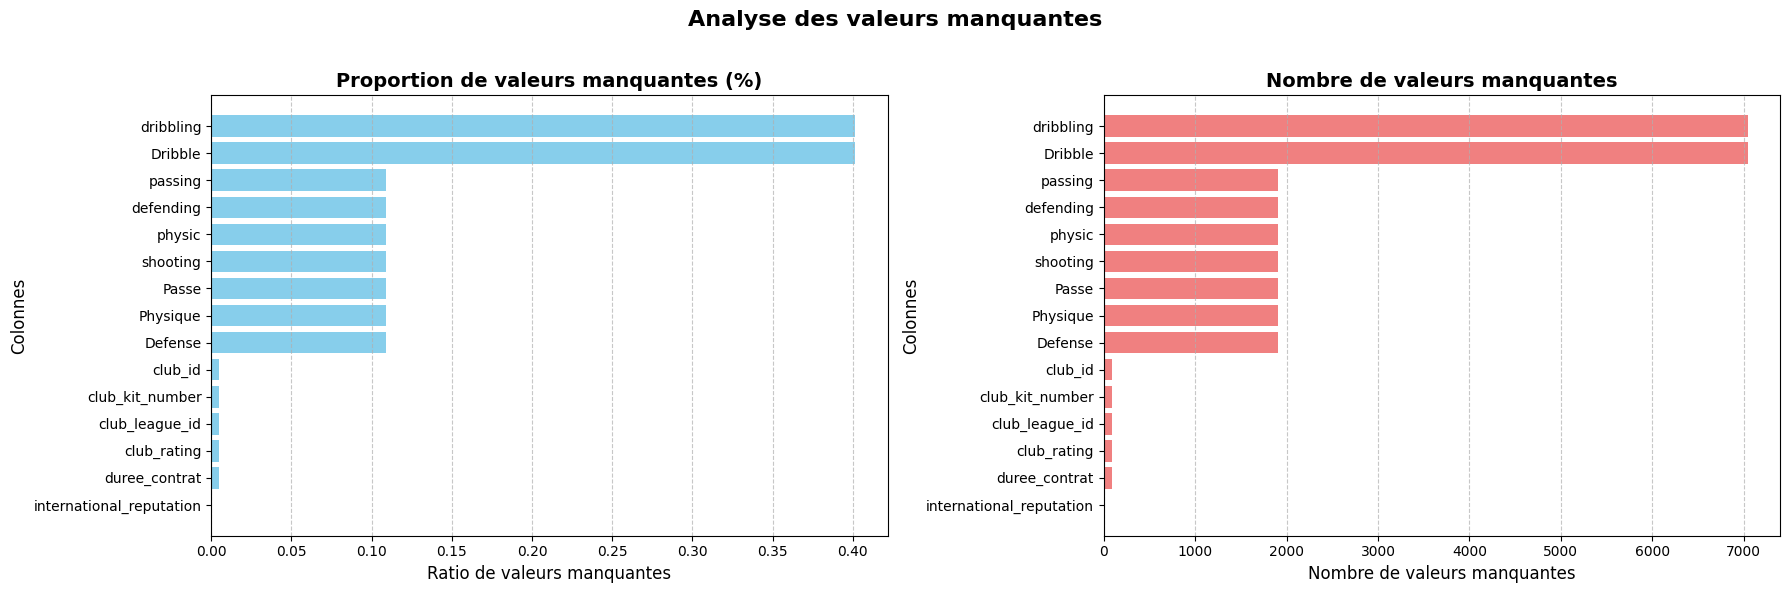

In [13]:
missing_ratio = df_encoded_num.isna().mean()
missing_number = df_encoded_num.isna().sum()

# On ne garde que les colonnes ayant au moins 1 valeur manquante
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
missing_number = missing_number[missing_number > 0].loc[missing_ratio.index] 

fig, (axe0, axe1) = plt.subplots(1, 2, figsize=(18, 6))
plt.suptitle("Analyse des valeurs manquantes", fontsize=16, fontweight="bold")

axe0.barh(missing_ratio.index, missing_ratio.values, color="skyblue")
axe0.set_title("Proportion de valeurs manquantes (%)", fontsize=14, fontweight="bold")
axe0.set_xlabel("Ratio de valeurs manquantes", fontsize=12)
axe0.set_ylabel("Colonnes", fontsize=12)
axe0.invert_yaxis() 
axe0.grid(axis='x', linestyle='--', alpha=0.7)

axe1.barh(missing_number.index, missing_number.values, color="lightcoral")
axe1.set_title("Nombre de valeurs manquantes", fontsize=14, fontweight="bold")
axe1.set_xlabel("Nombre de valeurs manquantes", fontsize=12)
axe1.set_ylabel("Colonnes", fontsize=12)
axe1.invert_yaxis()
axe1.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

**Analyse** :  
> Nous constatons qu'il y a exactement 85 valeurs manquantes pour les attributs consernants le clubs des joueurs `club_id`, `club_kit_number`, `club_league_id`, `club_rating` et `duree_de_contrat`, ce qui est dû au fait que certains joueurs n'ont pas de contrat avec un club. Nous décidons donc de supprimer ces 85 joueurs à fin de garder la cohérence dans les données (chaque joueurs est en contrat avec un club et a une équipe nationale). En ce qui conserne les varibles techniques, nous constatons qu'ils contiennent environ 10% de valeurs manquantes soit environ 1800 valeurs à l'exception des attributs `dribbling` contient 40% de valeurs manquantes soit 7000 valeurs. Nous constatons aussi qu'il y a des doublons dans colonnes nous decidons de les supprimés. Pour ces varibles, nous allons étudier en profondeur la possibilité d'une emputation predictive. Nous allons étudier l'existance d'une correlation entre les colonnes complètes et ces colonnes pour savoir s'il est possible de prédire les valeurs manquantes de ces colonnes en utilisant les colonnes complètes comme caractéristiques. Nous allons aussi supprimer les colonnes `player_id`, `club_league_id`, `club_kit_number` et `club_id` car elles ne contiennent aucune information pertinente pour l’analyse :
`player_id` est un identifiant unique sans lien avec les caractéristiques du joueur, `club_league_id`, `club_kit_number` et `club_id` sont des identifiants catégoriels dont la valeur numérique n’a pas de signification ni de relation hiérarchique entre les leagues et les clubs et ils contiennent trop de valeurs unique pour que nous avisageons des les encoder par un one-hot encoding.

In [14]:
print(f"Nombre de club : {len(df_encoded_num['club_id'].unique())}")
print(f"Nombre de league : {len(df_encoded_num['club_league_id'])}")

Nombre de club : 660
Nombre de league : 17540


In [15]:
# Suppression des joueurs sans club. et les colonnes doublon
print(pd.isnull(df_encoded_num['club_id']).sum())
idx_to_drop = df_encoded_num[pd.isnull(df_encoded_num['club_id'])].index
df_encoded_num.drop(idx_to_drop, inplace=True)
print(pd.isnull(df_encoded_num['club_id']).sum())
df_encoded_num.drop(columns=['player_id', 'club_league_id', 'club_kit_number',  'club_id', 'Dribble', 'Passe', 'Physique', 'Defense'], inplace=True)

85
0


In [16]:
missing_ratio = df_encoded_num.isna().mean()
missing_number = df_encoded_num.isna().sum()

print(missing_number[missing_number>0])
print()
print(missing_ratio[missing_ratio>0])

international_reputation       1
dribbling                   7014
passing                     1898
shooting                    1898
defending                   1898
physic                      1898
dtype: int64

international_reputation    0.000057
dribbling                   0.401833
passing                     0.108737
shooting                    0.108737
defending                   0.108737
physic                      0.108737
dtype: float64


In [17]:
df_encoded_num[pd.isnull(df_encoded_num['international_reputation'])]

height_cm  weight_kg  potential  skill_moves  international_reputation  \
83        192         95         85            4                       NaN   

    club_rating  dribbling  passing  shooting  defending  ...  \
83         77.0       68.0     68.0      57.0       86.0  ...   

    wage_cat_encoded  value_cat_encoded  club_position_cat_DEF  \
83               4.0                4.0                    0.0   

    club_position_cat_FWD  club_position_cat_MID  club_position_cat_SUB  \
83                    0.0                    1.0                    0.0   

    country_position_cat_DEF  country_position_cat_FWD  \
83                       0.0                       0.0   

    country_position_cat_MID  country_position_cat_SUB  
83                       0.0                       0.0  

[1 rows x 28 columns]

Nous allons faire une simple imputation par la médiane pour compléter la valeur manquante pour la colonne `international_reputation`. 

In [18]:
df_encoded_num['international_reputation'] = df_encoded_num['international_reputation'].fillna(df_encoded_num['international_reputation'].median())

In [19]:
df_encoded_num[pd.isnull(df_encoded_num['international_reputation'])]

Empty DataFrame
Columns: [height_cm, weight_kg, potential, skill_moves, international_reputation, club_rating, dribbling, passing, shooting, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, Attaque, age, IMC, duree_contrat, wage_cat_encoded, value_cat_encoded, club_position_cat_DEF, club_position_cat_FWD, club_position_cat_MID, club_position_cat_SUB, country_position_cat_DEF, country_position_cat_FWD, country_position_cat_MID, country_position_cat_SUB]
Index: []

[0 rows x 28 columns]

In [20]:
columns_to_complet = df_encoded_num.isna().sum()[df_encoded_num.isna().sum()>0].index.values
complet_columns = df_encoded_num.isna().sum()[df_encoded_num.isna().sum()==0].index.values
print(columns_to_complet)
print()
print(complet_columns)

['dribbling' 'passing' 'shooting' 'defending' 'physic']

['height_cm' 'weight_kg' 'potential' 'skill_moves'
 'international_reputation' 'club_rating' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy' 'Attaque' 'age' 'IMC'
 'duree_contrat' 'wage_cat_encoded' 'value_cat_encoded'
 'club_position_cat_DEF' 'club_position_cat_FWD' 'club_position_cat_MID'
 'club_position_cat_SUB' 'country_position_cat_DEF'
 'country_position_cat_FWD' 'country_position_cat_MID'
 'country_position_cat_SUB']


In [21]:
# Création du dictionnaire des données complètes/incomplètes
data = {
    col: {
        "complet": df_encoded_num[np.append(complet_columns, [col])][~df_encoded_num[col].isna()],
        "incomplet": df_encoded_num[np.append(complet_columns, [col])][df_encoded_num[col].isna()]
    }
    for col in columns_to_complet
}

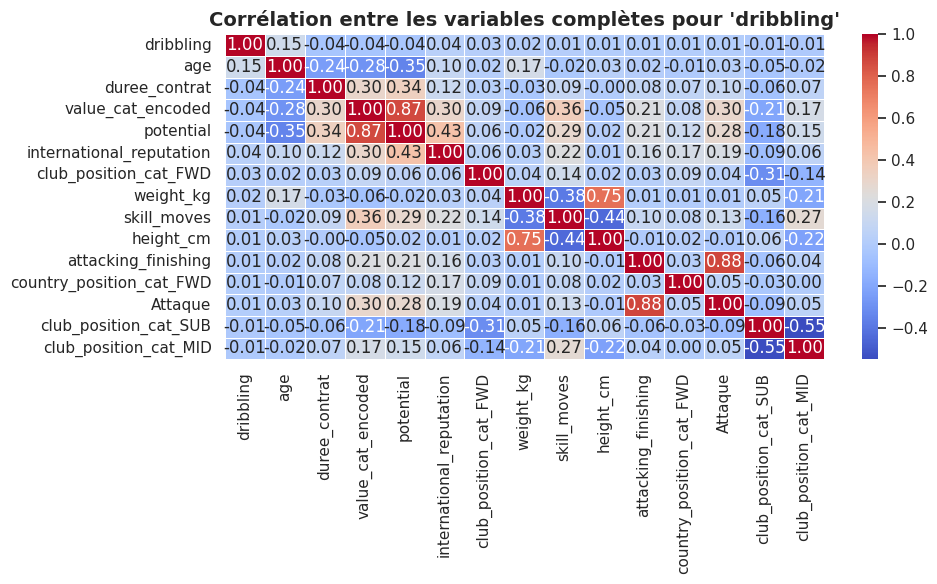

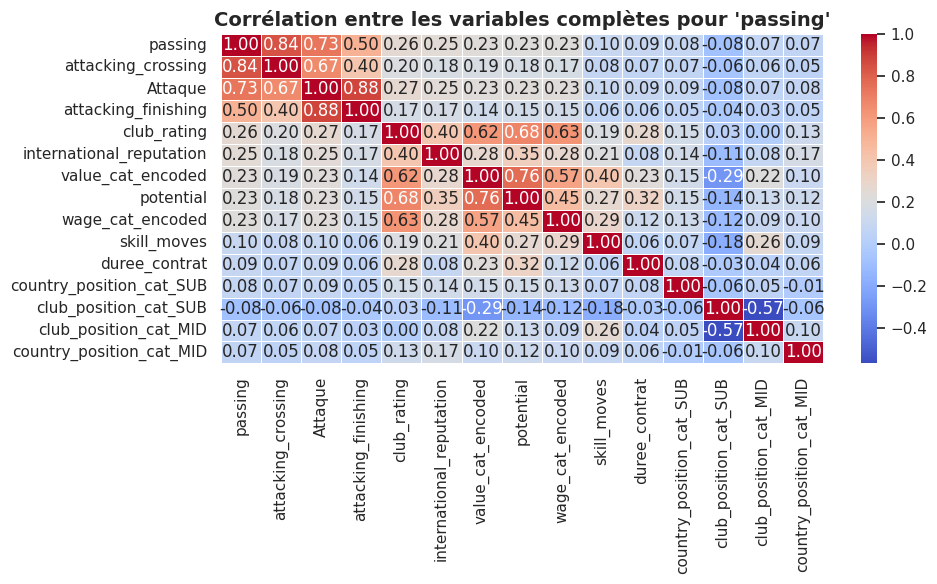

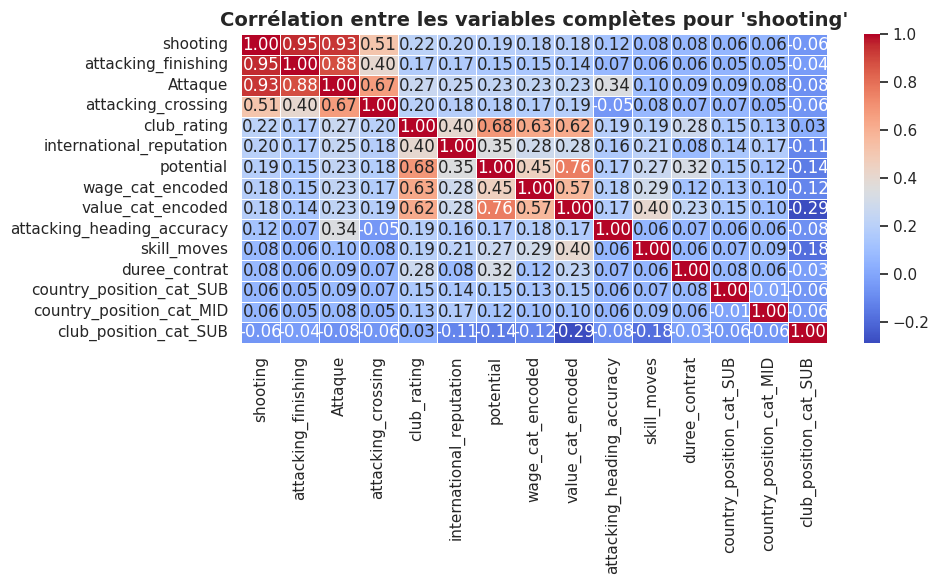

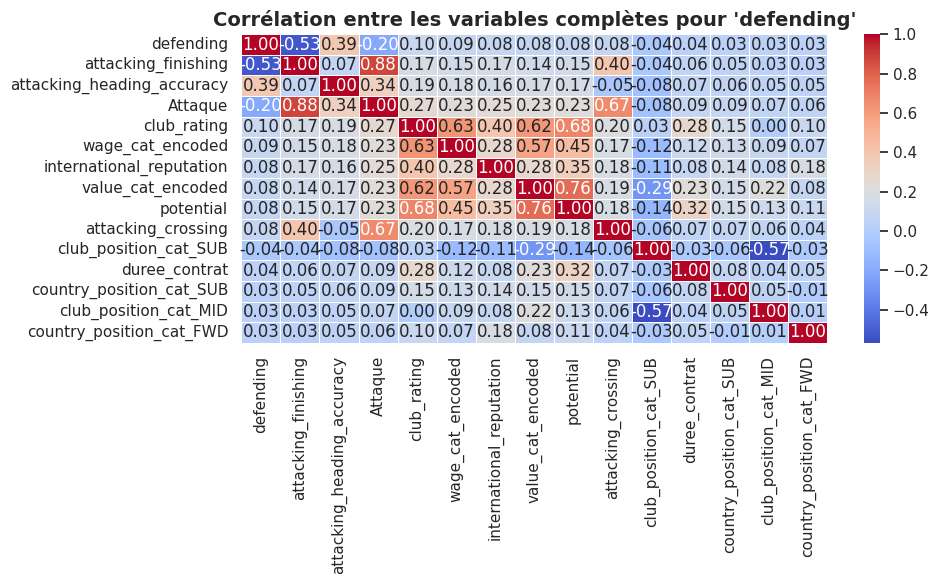

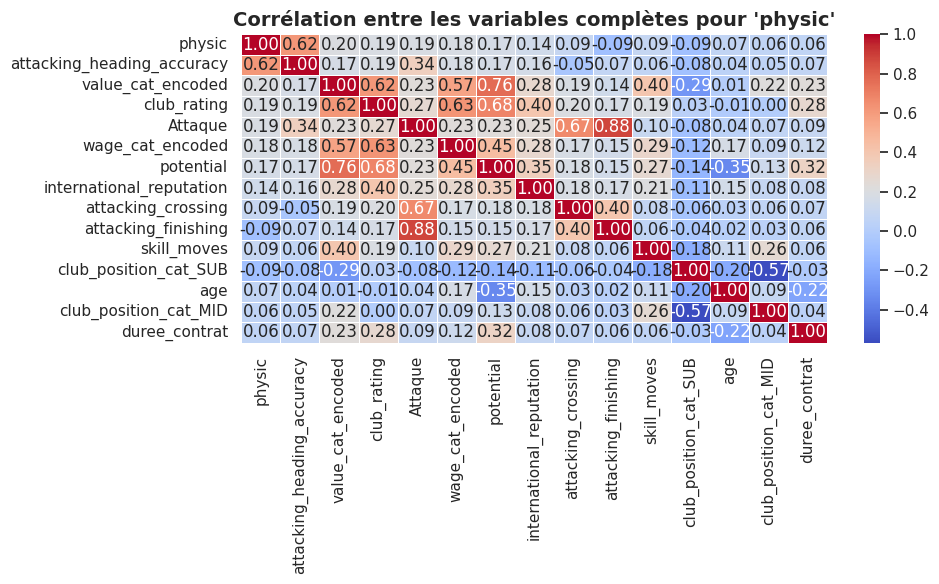

In [22]:
sns.set(style="whitegrid", font_scale=1.0)

for col, subset in data.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Corrélation entre les variables complètes pour '{col}'", fontsize=14, fontweight='bold')

    corr = subset['complet'].corr()
    if corr.shape[1] > 15:
        # On garde uniquement les 15 colonnes les plus corrélées à la cible
        target_corr = corr[col].abs().sort_values(ascending=False).head(15).index
        corr = corr.loc[target_corr, target_corr]

    sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar=True)
    plt.tight_layout()
    plt.show()

Nous constatons la présence de correlations satisfaisantes entre les colonnes (cibles)`passing`, `shooting` et `defending` et les colonnes complètes (caractéristiques) nous espérons donc pouvoir faire des prédictions assez précise des valeurs manquantes de ces colonnes. Par contre les colonnes `dribbling` et `physic` sont moins correlées avec les colonnes complètes, néanmoins nous allons tanter de créer un modèle et évaluer ses performances avant de statuer sur ces deux colonnes. 

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold



def train_polynomial_regression(df, target_col, k_list, degrees, test_size=0.3, random_state=42):
    """
    Entraîne un modèle de régression polynomiale en sélectionnant les j colonnes les plus corrélées à la cible.
    Les valeurs optimales de j (nombre de colonnes) et d (degré du polynôme)
    sont choisies par recherche par grille sur k_list et degrees.

    Paramètres
    ----------
    df : pandas.DataFrame
        Le jeu de données complet (sans valeurs manquantes).
    target_col : str
        Le nom de la colonne cible à prédire.
    k_list : list[int]
        Liste des valeurs possibles pour le nombre de caractéristiques les plus corrélées.
    degrees : list[int]
        Liste des degrés possibles du polynôme.
    test_size : float
        Taille de l’échantillon de test (entre 0 et 1).
    random_state : int
        Graine pour la reproductibilité.

    Retourne
    --------
    best_model : sklearn.Pipeline
        Le meilleur modèle entraîné.
    best_params : dict
        Les paramètres optimaux trouvés (k et degree).
    best_score : float
        Le score R² du modèle sur le jeu de test.
    """

    if target_col not in df.columns:
        raise ValueError(f"La colonne cible '{target_col}' n'existe pas dans le DataFrame.")

    corr = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)
    
    best_score = -np.inf
    best_model = None
    best_params = {}

    # --- Recherche par grille sur k et degree ---
    for k in k_list:
        top_features = corr.head(k).index.tolist()
        X = df[top_features]
        y = df[target_col]

        cv = KFold(n_splits=3, shuffle=True, random_state=random_state)

        for degree in degrees:
            model = Pipeline([
                ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('regressor', LinearRegression())
            ])
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
            mean_score = scores.mean()

            # Sauvegarde du meilleur modèle
            if mean_score > best_score:
                best_score = mean_score
                best_model = model
                best_params = {"k": k, "degree": degree, "features": top_features}
                print(f"[k={k}, degree={degree}] => mean score = {mean_score:.3f}")

    print("\n Meilleur modèle trouvé :")
    print(f" - k = {best_params['k']}")
    print(f" - degree = {best_params['degree']}")
    print(f" - Score R² (test) = {best_score:.3f}")

    return best_model, best_params, best_score



In [24]:
k_list = list(range(2,13,2))
degrees = list(range(1,5))

model_trained = {}
for col, subset in data.items() :
    print(f"\n===================Cible : {col}=================")
    model_trained[col] = train_polynomial_regression(subset['complet'], col, k_list, degrees)


===================Cible : dribbling=================
[k=2, degree=1] => mean score = 0.020
[k=2, degree=2] => mean score = 0.021
[k=2, degree=3] => mean score = 0.023

 Meilleur modèle trouvé :
 - k = 2
 - degree = 3
 - Score R² (test) = 0.023

===================Cible : passing=================
[k=2, degree=1] => mean score = 0.760
[k=2, degree=2] => mean score = 0.774
[k=2, degree=3] => mean score = 0.779
[k=2, degree=4] => mean score = 0.784
[k=4, degree=2] => mean score = 0.788
[k=4, degree=3] => mean score = 0.795
[k=4, degree=4] => mean score = 0.804
[k=6, degree=3] => mean score = 0.810
[k=8, degree=3] => mean score = 0.813

 Meilleur modèle trouvé :
 - k = 8
 - degree = 3
 - Score R² (test) = 0.813

===================Cible : shooting=================
[k=2, degree=1] => mean score = 0.946
[k=2, degree=2] => mean score = 0.947
[k=2, degree=3] => mean score = 0.948
[k=2, degree=4] => mean score = 0.948
[k=4, degree=2] => mean score = 0.949
[k=4, degree=3] => mean score = 0.950


Nous constatons que les modèles entraînés pour prédire les colonnes `passing`, `shooting` et `defending` présentent des performances satisfaisantes, avec des scores élevés (supérieurs à 0.7). Cela signifie que ces caractéristiques peuvent être prédites de manière fiable à partir des autres variables du jeu de données.

En revanche, les modèles pour `physic` et `dribbling` montrent des performances plus faibles (autour de 0.5 ou moins), indiquant que leurs relations avec les autres variables ne sont pas entièrement captées dans cette première partie.

Pour améliorer la prédiction de ces deux variables, nous allons réentraîner de nouveaux modèles en incluant les colonnes que nous allons imputées (`passing`, `shooting`, `defending`) comme caractéristiques supplémentaires.
Cela permet de tirer parti des corrélations potentielles entre ces variables, souvent interdépendantes dans le contexte du football (par exemple, un joueur bon en défense ou en tir peut aussi avoir un physique ou un dribble spécifique).

In [25]:
# Imputation des colonnes 
cols_to_impute_first = ["passing", "shooting", "defending"]

for col in cols_to_impute_first:
    best_model, best_params, _ = model_trained[col]
    features = best_params["features"]

    subset_complet = data[col]["complet"]
    subset_incomplet = data[col]["incomplet"]

    # On refit le modèle sur toutes les données complètes
    X_full = subset_complet[features]
    y_full = subset_complet[col]
    best_model.fit(X_full, y_full)

    # Prédiction sur les données incomplètes
    X_incomplete = subset_incomplet[features]
    y_pred = best_model.predict(X_incomplete)

    # Imputation dans le DataFrame original
    df_encoded_num.loc[subset_incomplet.index, col] = y_pred

df_updated = df_encoded_num.copy()
df_updated.head()

height_cm  weight_kg  potential  skill_moves  international_reputation  \
0        190         82         91            3                       5.0   
1        175         72         91            4                       5.0   
2        186         75         94            4                       5.0   
3        195         94         92            3                       5.0   
4        176         73         94            5                       5.0   

   club_rating  dribbling    passing  shooting   defending  ...  \
0         85.0       64.0  86.000000      89.0   27.000000  ...   
1         84.0        NaN  81.000000      93.0   32.000000  ...   
2         85.0       50.0  83.000000      86.0   32.000000  ...   
3         85.0       72.0  81.000000      91.0   34.000000  ...   
4         85.0       55.0  81.140387      25.0  189.946747  ...   

   wage_cat_encoded  value_cat_encoded  club_position_cat_DEF  \
0               4.0                4.0                    0.0   
1               4.0                4.0                    0.0   
2               4.0                4.0                    0.0   
3               4.0                4.0                    0.0   
4               4.0                4.0                    0.0   

   club_position_cat_FWD  club_position_cat_MID  club_position_cat_SUB  \
0                    0.0                    0.0                    1.0   
1                    0.0                    1.0                    0.0   
2                    0.0                    1.0                    0.0   
3                    0.0                    0.0                    1.0   
4                    1.0                    0.0                    0.0   

   country_position_cat_DEF  country_position_cat_FWD  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       1.0   
4                       0.0                       0.0   

   country_position_cat_MID  country_position_cat_SUB  
0                       0.0                       1.0  
1                       0.0                       0.0  
2                       1.0                       0.0  
3                       0.0                       0.0  
4                       0.0                       0.0  

[5 rows x 28 columns]

In [26]:
cols_to_impute_second = ["physic", "dribbling"]
k_list = list(range(2,13,2))
degrees = list(range(1,5))

model_trained_second_phase = {}
for col in cols_to_impute_second:
    subset = df_updated[df_updated[col].notna()]  # données complètes pour cette colonne
    print(f"\n===================Cible (Phase 2) : {col}=================")
    model_trained_second_phase[col] = train_polynomial_regression(
        subset, col, k_list, degrees
    )


===================Cible (Phase 2) : physic=================
[k=2, degree=1] => mean score = 0.521
[k=2, degree=2] => mean score = 0.544
[k=2, degree=3] => mean score = 0.548
[k=2, degree=4] => mean score = 0.549
[k=4, degree=2] => mean score = 0.556
[k=4, degree=3] => mean score = 0.560
[k=4, degree=4] => mean score = 0.561
[k=6, degree=2] => mean score = 0.567
[k=6, degree=3] => mean score = 0.572
[k=8, degree=3] => mean score = 0.578
[k=12, degree=2] => mean score = 0.586

 Meilleur modèle trouvé :
 - k = 12
 - degree = 2
 - Score R² (test) = 0.586

===================Cible (Phase 2) : dribbling=================
[k=2, degree=1] => mean score = 0.020
[k=2, degree=2] => mean score = 0.021
[k=2, degree=3] => mean score = 0.023

 Meilleur modèle trouvé :
 - k = 2
 - degree = 3
 - Score R² (test) = 0.023


Pour la colonne `physic`, nous allons utiliser le modèle prédictif, car nous estimons qu'avec un score de 0.58, les performances sont acceptables et que les prédictions ne relèvent pas du simple hasard.
En revanche, pour la colonne dribbling, dont le score est très faible, nous allons étudier la distribution des valeurs existantes et procéder à une imputation simple (par la médiane ou une autre mesure représentative) en fonction de cette distribution.

In [27]:
subset_complet = df_updated[df_updated['physic'].notna()]
subset_incomplet = df_updated[df_updated['physic'].isna()]

In [28]:
best_model, best_params, _ = model_trained_second_phase["physic"]
features = best_params["features"]

X_full = subset_complet[features]
y_full = subset_complet["physic"]
best_model.fit(X_full, y_full)

X_incomplete = subset_incomplet[features]
y_pred = best_model.predict(X_incomplete)

df_updated.loc[subset_incomplet.index, "physic"] = y_pred

In [29]:
subset_complet["physic"].describe()

count    15557.000000
mean        65.280388
std          9.840725
min         28.000000
25%         59.000000
50%         66.000000
75%         73.000000
max         91.000000
Name: physic, dtype: float64

In [30]:
df_updated["physic"].describe()

count    17455.000000
mean        65.679417
std         11.180932
min         28.000000
25%         58.578450
50%         66.000000
75%         73.000000
max        197.784877
Name: physic, dtype: float64

Nous pouvons constater que la distribution après imputation reste globalement similaire à celle avant imputation, ce qui est un bon signe et indique que le modèle n’a pas trop déformé la structure initiale des données. Toutefois, quelques valeurs extrêmes sont apparues (jusqu’à 197 alors que la valeur maximale initiale était de 91). Afin d’éviter que ces valeurs aberrantes n’influencent négativement les étapes suivantes, nous allons appliquer un clipping pour borner les valeurs de la colonne `physic` dans son intervalle réel observé avant imputation.

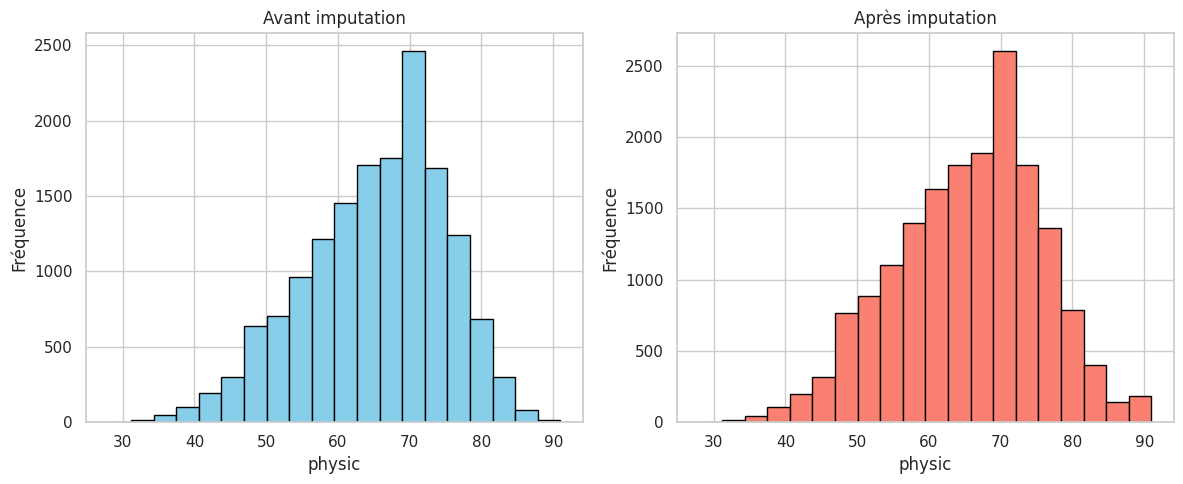

In [31]:
df_updated['physic'] = df_updated['physic'].clip(lower=subset_complet["physic"].min(), upper=subset_complet["physic"].max())

before = subset_complet["physic"]
after = df_updated["physic"]

plt.figure(figsize=(12, 5))

# Histogramme avant imputation
plt.subplot(1, 2, 1)
plt.hist(before, bins=20, color='skyblue', edgecolor='black')
plt.title("Avant imputation")
plt.xlabel("physic")
plt.ylabel("Fréquence")

# Histogramme après imputation
plt.subplot(1, 2, 2)
plt.hist(after, bins=20, color='salmon', edgecolor='black')
plt.title("Après imputation")
plt.xlabel("physic")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

Nous pouvons constater qu'après traitement, les deux distribution (avant imputation et après imputation) sont quasi-similaire ce qui bon signe. Nous allons nous occuper maintenant de la dernière colonne `dribbling`. 

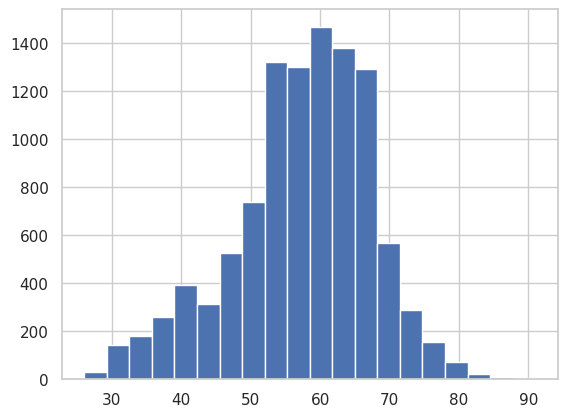

In [32]:
subset_complet_dribbling = df_updated[df_updated["dribbling"].notna()]["dribbling"]
plt.hist(subset_complet_dribbling, bins=20)
plt.show()

Nous pouvons observer que la distribution de la variable `dribbling` est assez symétrique et proche d'une distribution normale. Nous pensons donc qu'une imputation par la médiane serait tout à fait appropriée, car la distribution est équilibrée.

In [33]:
df_updated["dribbling"] = df_updated["dribbling"].fillna(subset_complet_dribbling.median())

#### Normalisation

In [34]:
from sklearn.compose import ColumnTransformer

cat_variable = [
    "wage_cat_encoded", "value_cat_encoded", 
    "club_position_cat_DEF", "club_position_cat_FWD", 
    "club_position_cat_MID", "club_position_cat_SUB", 
    "country_position_cat_DEF", "country_position_cat_FWD", 
    "country_position_cat_MID", "country_position_cat_SUB"
]

num_variable = [col for col in df_updated.columns if col not in cat_variable]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_variable),  
        ('cat', 'passthrough', cat_variable)     
    ]
)

# Appliquer la transformation
df_final = pd.DataFrame(
    preprocessor.fit_transform(df_updated),
    columns=num_variable + cat_variable,  
    index=df_updated.index
)

In [35]:
df_final.head()

height_cm  weight_kg  potential  skill_moves  international_reputation  \
0   1.232186   1.037643   3.229681     0.764344                 10.602002   
1  -0.990277  -0.439072   3.229681     2.120475                 10.602002   
2   0.639530   0.003942   3.718651     2.120475                 10.602002   
3   1.973007   2.809701   3.392671     0.764344                 10.602002   
4  -0.842113  -0.291401   3.718651     3.476606                 10.602002   

   club_rating  dribbling   passing  shooting  defending  ...  \
0     3.221583   0.777479  2.411845  2.459952  -1.429128  ...   
1     3.022002   0.131836  2.010854  2.709949  -1.149371  ...   
2     3.221583  -1.030322  2.171250  2.272453  -1.149371  ...   
3     3.221583   1.810509  2.010854  2.584950  -1.037468  ...   
4     3.221583  -0.384678  2.022113 -1.540013   7.687963  ...   

   wage_cat_encoded  value_cat_encoded  club_position_cat_DEF  \
0               4.0                4.0                    0.0   
1               4.0                4.0                    0.0   
2               4.0                4.0                    0.0   
3               4.0                4.0                    0.0   
4               4.0                4.0                    0.0   

   club_position_cat_FWD  club_position_cat_MID  club_position_cat_SUB  \
0                    0.0                    0.0                    1.0   
1                    0.0                    1.0                    0.0   
2                    0.0                    1.0                    0.0   
3                    0.0                    0.0                    1.0   
4                    1.0                    0.0                    0.0   

   country_position_cat_DEF  country_position_cat_FWD  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       1.0   
4                       0.0                       0.0   

   country_position_cat_MID  country_position_cat_SUB  
0                       0.0                       1.0  
1                       0.0                       0.0  
2                       1.0                       0.0  
3                       0.0                       0.0  
4                       0.0                       0.0  

[5 rows x 28 columns]

In [36]:
df_final.isnull().sum()

height_cm                     0
weight_kg                     0
potential                     0
skill_moves                   0
international_reputation      0
club_rating                   0
dribbling                     0
passing                       0
shooting                      0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
Attaque                       0
age                           0
IMC                           0
duree_contrat                 0
wage_cat_encoded              0
value_cat_encoded             0
club_position_cat_DEF         0
club_position_cat_FWD         0
club_position_cat_MID         0
club_position_cat_SUB         0
country_position_cat_DEF      0
country_position_cat_FWD      0
country_position_cat_MID      0
country_position_cat_SUB      0
dtype: int64

In [38]:
df_final.to_csv("../../partie4/data/data_for_clustering.csv", index=False)
df_final.shape

(17455, 28)

Nous avons à présent des données complète contenant *17455* lignes et *29* colonnes, nous pouvons donc commencer l'étape de la répartition de nos données en groupes (clustering). 

## Partie 2 – Clustering
### 2.1 K-means

In [38]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

#### QUESTION 1 & 2: K-MEANS AVEC MÉTHODE DU COUDE

In [39]:
# Paramètres
n_executions = 20
k_max = 10  

inertie_par_k = {}
solutions_par_k = {}

for k in range(2, k_max + 1):
    inertie_par_k[k] = []
    solutions_par_k[k] = []
    
    for execution in range(n_executions):
        kmeans = KMeans(n_clusters=k, random_state=execution, n_init=10, max_iter=300)
        labels = kmeans.fit_predict(df_final)
        
        inertie_par_k[k].append(kmeans.inertia_)
        solutions_par_k[k].append(labels)
    
    print(f"K={k}: Inertie moyenne = {np.mean(inertie_par_k[k]):.2f}")

# Calcul de l'inertie moyenne par k
inertie_moyenne = [np.mean(inertie_par_k[k]) for k in range(2, k_max + 1)]

K=2: Inertie moyenne = 327808.86
K=3: Inertie moyenne = 294613.83
K=4: Inertie moyenne = 277534.66
K=5: Inertie moyenne = 262901.25
K=6: Inertie moyenne = 249157.08
K=7: Inertie moyenne = 239140.02
K=8: Inertie moyenne = 231505.85
K=9: Inertie moyenne = 225229.80
K=10: Inertie moyenne = 219452.58


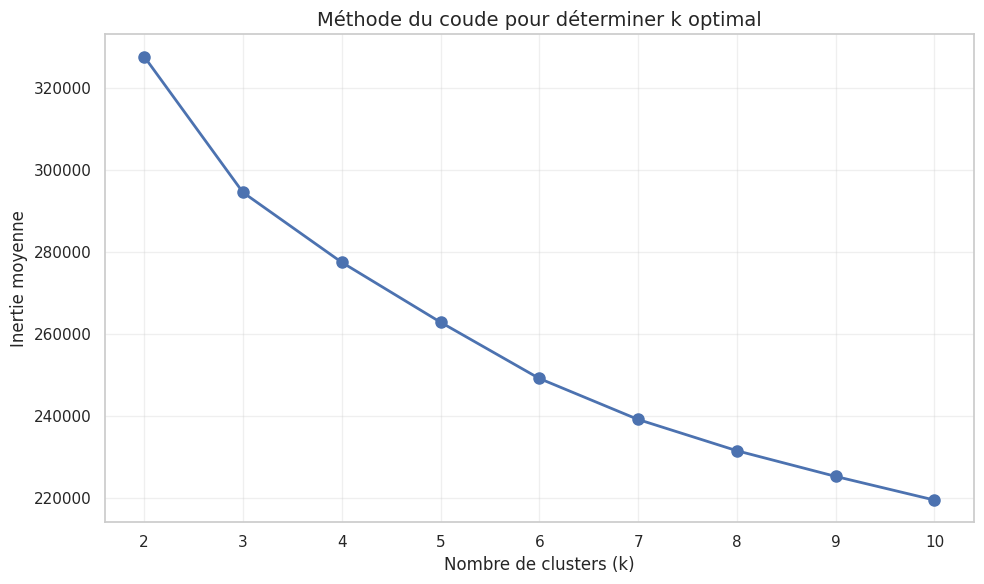

In [40]:
# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(2, k_max + 1), inertie_moyenne, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Inertie moyenne', fontsize=12)
plt.title('Méthode du coude pour déterminer k optimal', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
# Détermination du k optimal
# Calcul des différences secondes pour trouver le coude
differences = np.diff(inertie_moyenne)
differences_secondes = np.diff(differences)
k_coude = np.argmax(differences_secondes) + 3  # +3 car on commence à k=2 et double diff

print(f"\nK optimal (méthode du coude): {k_coude}")

# Sélection de la solution médiane pour k_coude
inertie_k_optimal = inertie_par_k[k_coude]
index_median = np.argsort(inertie_k_optimal)[len(inertie_k_optimal) // 2]
C1 = solutions_par_k[k_coude][index_median]

print(f"Solution C1 sélectionnée")
print(f"Distribution des clusters C1:")
unique, counts = np.unique(C1, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} joueurs ({count/len(C1)*100:.1f}%)")


K optimal (méthode du coude): 3
Solution C1 sélectionnée
Distribution des clusters C1:
  Cluster 0: 4827 joueurs (27.7%)
  Cluster 1: 7260 joueurs (41.6%)
  Cluster 2: 5368 joueurs (30.8%)


La méthode des différences secondes identifie k=3 comme point optimal, où le taux de décroissance de l'inertie change le plus significativement. Ce choix est particulièrement pertinent car il produit trois clusters bien équilibrés (27.7%, 41.6%, 30.8%), évitant ainsi les groupes trop déséquilibrés. Avec k=3, on obtient une segmentation suffisamment granulaire pour distinguer les profils de joueurs tout en maintenant des groupes de taille significative permettant des analyses statistiques robustes.

#### Question 3: Indice de silhouette

In [42]:
silhouette_par_k = {}

for k in range(2, k_max + 1):
    silhouette_par_k[k] = []
    
    for execution in range(n_executions):
        labels = solutions_par_k[k][execution]
        score = silhouette_score(df_final, labels)
        silhouette_par_k[k].append(score)
    
    print(f"K={k}: Silhouette moyenne = {np.mean(silhouette_par_k[k]):.4f}")

# Calcul du score de silhouette moyen par k
silhouette_moyen = [np.mean(silhouette_par_k[k]) for k in range(2, k_max + 1)]

K=2: Silhouette moyenne = 0.1629
K=3: Silhouette moyenne = 0.1276
K=4: Silhouette moyenne = 0.1278
K=5: Silhouette moyenne = 0.1162
K=6: Silhouette moyenne = 0.1186
K=7: Silhouette moyenne = 0.1114
K=8: Silhouette moyenne = 0.1146
K=9: Silhouette moyenne = 0.1078
K=10: Silhouette moyenne = 0.1037


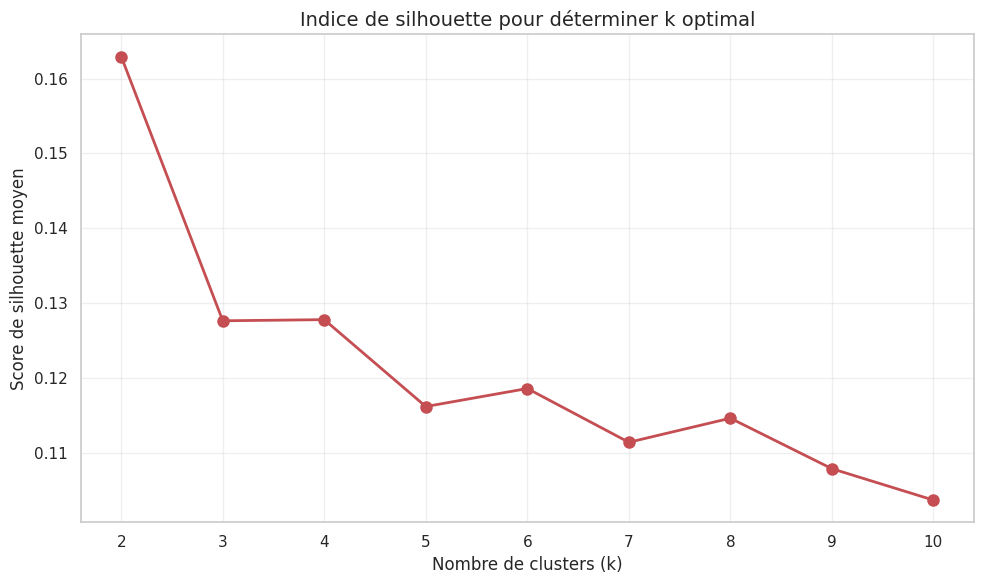

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, k_max + 1), silhouette_moyen, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Score de silhouette moyen', fontsize=12)
plt.title('Indice de silhouette pour déterminer k optimal', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
k_silhouette = 4
silhouette_k_optimal = silhouette_par_k[k_silhouette]
index_median_sil = np.argsort(silhouette_k_optimal)[len(silhouette_k_optimal) // 2]
C2 = solutions_par_k[k_silhouette][index_median_sil]

print(f"Solution C2 sélectionnée")
print(f"Distribution des clusters C2:")
unique, counts = np.unique(C2, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} joueurs ({count/len(C2)*100:.1f}%)")

Solution C2 sélectionnée
Distribution des clusters C2:
  Cluster 0: 6623 joueurs (37.9%)
  Cluster 1: 4622 joueurs (26.5%)
  Cluster 2: 790 joueurs (4.5%)
  Cluster 3: 5420 joueurs (31.1%)


L'indice de silhouette suggère k=2 comme valeur optimale avec un score de 0.162, indiquant une séparation nette entre deux grands groupes de joueurs. Cependant, k=2 peut être trop simpliste pour capturer la diversité des profils de footballeurs. Les valeurs k=3 et k=4 présentent également des scores de silhouette relativement élevés (environ 0.128), offrant un bon compromis entre homogénéité des clusters et granularité de l'analyse. Nous décidons donc de choisir k=4 pour cette méthode car c'est la deuxième valeur avec le score moyen de silhouette le plus élevé. Ensuite, cette solution révèle une structure plus nuancée avec un cluster élite de 790 joueurs (4.5%) qui se distingue nettement, probablement composé de joueurs d'exception aux caractéristiques uniques. Les trois autres clusters (37.9%, 26.5%, 31.1%) restent bien équilibrés et permettent une segmentation plus fine.

#### QUESTION 4: COMPARAISON ET INTERPRÉTATION DES SOLUTIONS C1 ET C2


ANALYSE DE LA SOLUTION C1 (Méthode du coude)

--- CLUSTER 0 ---
Nombre de joueurs: 4827

Positions:
Position
SUB    3294
MID     643
DEF     639
FWD     251
Name: count, dtype: int64

Top 5 caractéristiques (moyennes les plus élevées):
value_cat_encoded        1.475451
wage_cat_encoded         1.424487
club_position_cat_SUB    0.682411
defending                0.360263
club_position_cat_MID    0.133209
dtype: float64

--- CLUSTER 1 ---
Nombre de joueurs: 7260

Positions:
Position
SUB    4932
DEF    1087
MID     890
FWD     351
Name: count, dtype: int64

Top 5 caractéristiques (moyennes les plus élevées):
value_cat_encoded        1.170799
wage_cat_encoded         1.166253
club_position_cat_SUB    0.679339
attacking_finishing      0.476983
shooting                 0.461605
dtype: float64

--- CLUSTER 2 ---
Nombre de joueurs: 5368

Positions:
Position
SUB    2649
MID    1342
DEF     901
FWD     476
Name: count, dtype: int64

Top 5 caractéristiques (moyennes les plus élevées):
value_cat_e

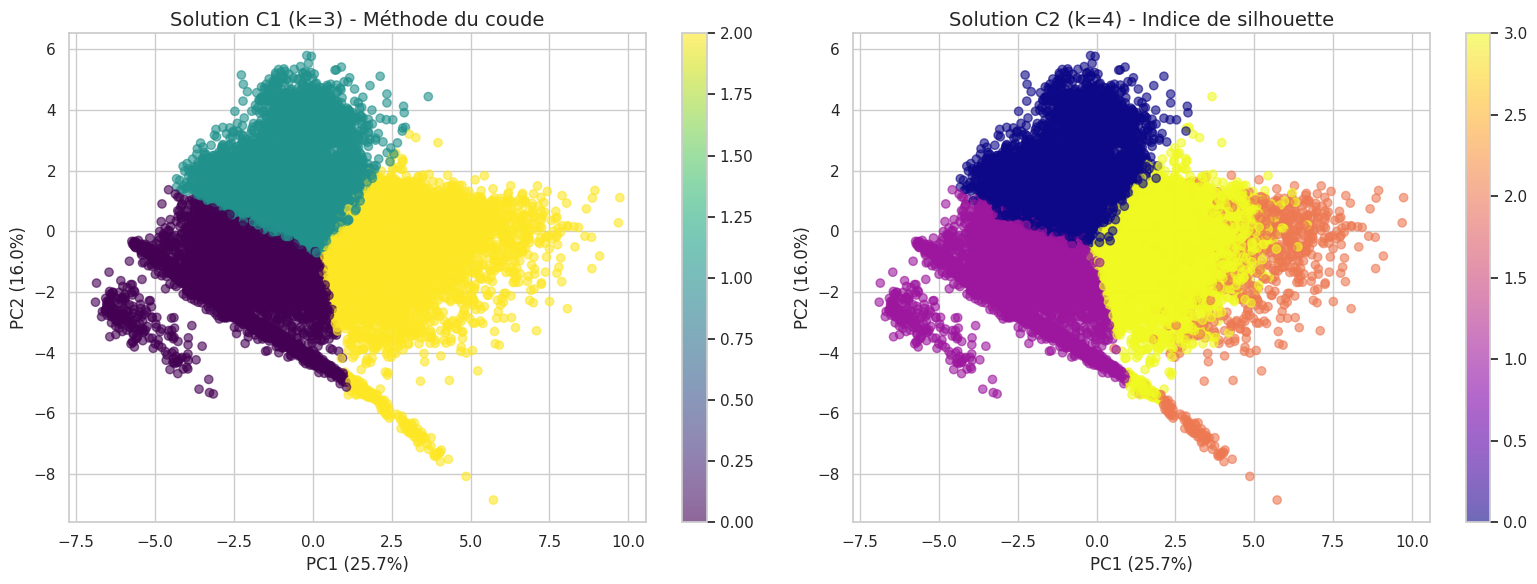

In [45]:
df_results = df_final.copy()
df_results['Cluster_C1'] = C1
df_results['Cluster_C2'] = C2

df_results['Player'] = df.loc[df_final.index, "name"].values
df_results['Position'] = df.loc[df_final.index, "club_position_cat"].values
df_results['Overall_Rating'] = df.loc[df_final.index, "overall_rating"].values

# 1. Analyse des profils de clusters pour C1
print("\n" + "="*80)
print("ANALYSE DE LA SOLUTION C1 (Méthode du coude)")
print("="*80)

for cluster in range(k_coude):
    print(f"\n--- CLUSTER {cluster} ---")
    cluster_data = df_results[df_results['Cluster_C1'] == cluster]
    print(f"Nombre de joueurs: {len(cluster_data)}")
    
    # Statistiques par position
    print("\nPositions:")
    print(cluster_data['Position'].value_counts())
    
    # Caractéristiques moyennes (top 5 variables discriminantes)
    moyennes = cluster_data[df_final.columns].mean()
    print("\nTop 5 caractéristiques (moyennes les plus élevées):")
    print(moyennes.nlargest(5))

# 2. Analyse des profils de clusters pour C2
print("\n" + "="*80)
print("ANALYSE DE LA SOLUTION C2 (Indice de silhouette)")
print("="*80)

for cluster in range(k_silhouette):
    print(f"\n--- CLUSTER {cluster} ---")
    cluster_data = df_results[df_results['Cluster_C2'] == cluster]
    print(f"Nombre de joueurs: {len(cluster_data)}")
    
    print("\nPositions:")
    print(cluster_data['Position'].value_counts())
    
    moyennes = cluster_data[df_final.columns].mean()
    print("\nTop 5 caractéristiques (moyennes les plus élevées):")
    print(moyennes.nlargest(5))

# 3. Comparaison visuelle avec PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_final)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualisation C1
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=C1, cmap='viridis', alpha=0.6)
axes[0].set_title(f'Solution C1 (k={k_coude}) - Méthode du coude', fontsize=14)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(scatter1, ax=axes[0])

# Visualisation C2
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=C2, cmap='plasma', alpha=0.6)
axes[1].set_title(f'Solution C2 (k={k_silhouette}) - Indice de silhouette', fontsize=14)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

**Solution C1 (k=3)**

La solution C1 révèle trois profils distincts basés sur le niveau de compétence et le potentiel :

> - Cluster 0 (27.7%) : Joueurs défensifs de niveau moyen, majoritairement remplaçants, avec des caractéristiques défensives marquées et une valeur/salaire modérés
> - Cluster 1 (41.6%) : Joueurs offensifs de niveau moyen, également dominés par les remplaçants, mais avec des compétences en attaque et tir supérieures
> - Cluster 2 (30.8%) : L'élite du football, avec des valeurs et salaires 3x supérieurs aux autres clusters, excellent potentiel et passing, représentant les joueurs titulaires de haut niveau

**Solution C2 (k=4)**

La solution C2 offre une segmentation plus nuancée en isolant un groupe d'élite :

> - Cluster 0 (37.9%) : Joueurs offensifs moyens, profil similaire au Cluster 1 de C1
> - Cluster 1 (26.5%) : Joueurs défensifs moyens, profil similaire au Cluster 0 de C1
> - Cluster 2 (4.5%) : Les superstars mondiales avec une réputation internationale exceptionnelle (4.23/5), valeur/salaire maximaux (environ 3.9), et un rating de club très élevé (1.88)
> - Cluster 3 (31.1%) : Joueurs talentueux en progression, valeur/salaire élevés (environ 3.2) mais sans la réputation internationale du Cluster 2

**Analyse comparative**

L'ARI (Adjusted Rand Index) entre C1 et C2 devrait révéler une correspondance modérée, car C2 raffine C1 en subdivisant le cluster élite. La principale différence réside dans l'identification par C2 d'un micro-segment de superstars (790 joueurs) qui possèdent une réputation internationale exceptionnelle, là où C1 les mélange avec les joueurs talentueux ordinaires. Cette distinction est pourrait être importante pour des applications comme le recrutement ou l'identification de remplaçants pour des joueurs de classe mondiale.


In [46]:
# QUESTION 5: IDENTIFIER UN REMPLAÇANT POUR KYLIAN MBAPPÉ

print("\n" + "="*80)
print("IDENTIFICATION DE REMPLAÇANTS POUR UN JOUEUR CÉLÈBRE")
print("="*80)

joueur_cible = "Kylian Mbappé Lottin -"  
joueur_mask = df_results['Player'].str.contains(joueur_cible, case=False, na=False)

if joueur_mask.sum() == 0:
    print(f"Joueur '{joueur_cible}' non trouvé. Voici quelques noms de joueurs célèbres:")
    print(df_results.nlargest(20, 'Overall_Rating')[['Player', 'Position']].to_string())
else:
    joueur_data = df_results[joueur_mask].iloc[0]
    print(f"\nJoueur sélectionné: {joueur_data['Player']}")
    print(f"   Position: {joueur_data['Position']}")
    print(f"   Overall Rating: {joueur_data['Overall_Rating']}")
    print(f"   Cluster C1 (k=3): {joueur_data['Cluster_C1']}")
    print(f"   Cluster C2 (k=4): {joueur_data['Cluster_C2']}")
    
    # ========== SOLUTION C1 (k=3) ==========
    print(f"\n{'='*80}")
    print("REMPLAÇANTS SELON SOLUTION C1 (Méthode du coude, k=3)")
    print(f"{'='*80}")
    
    cluster_c1 = joueur_data['Cluster_C1']
    meme_cluster_c1 = df_results[df_results['Cluster_C1'] == cluster_c1].copy()
    print(f"\nNombre de joueurs dans le même cluster C1: {len(meme_cluster_c1)}")
    
    joueur_features = df_final.loc[joueur_data.name].values
    distances_c1 = []
    
    for idx in meme_cluster_c1.index:
        if idx != joueur_data.name:
            autre_joueur_features = df_final.loc[idx].values
            dist = np.linalg.norm(joueur_features - autre_joueur_features)
            distances_c1.append(dist)
        else:
            distances_c1.append(np.inf)
    
    meme_cluster_c1['Distance'] = distances_c1
    remplacants_c1 = meme_cluster_c1.nsmallest(10, 'Distance')
    
    colonnes_affichage = ['Player', 'Position', 'Distance']
    if 'Overall_Rating' in remplacants_c1.columns:
        colonnes_affichage.append('Overall_Rating')
    
    print(f"\nTOP 10 REMPLAÇANTS (C1):")
    print(remplacants_c1[colonnes_affichage].to_string(index=False))
    
    print(f"\n MEILLEUR REMPLAÇANT C1:")
    meilleur_c1 = remplacants_c1.iloc[0]
    print(f"    {meilleur_c1['Player']} ({meilleur_c1['Position']})")
    print(f"    Distance: {meilleur_c1['Distance']:.3f}")
    if 'Overall_Rating' in meilleur_c1.index:
        print(f"    Overall Rating: {meilleur_c1['Overall_Rating']}")
    
    # ========== SOLUTION C2 (k=4) ==========
    print(f"\n{'='*80}")
    print("REMPLAÇANTS SELON SOLUTION C2 (Indice de silhouette, k=4)")
    print(f"{'='*80}")
    
    cluster_c2 = joueur_data['Cluster_C2']
    meme_cluster_c2 = df_results[df_results['Cluster_C2'] == cluster_c2].copy()
    print(f"\nNombre de joueurs dans le même cluster C2: {len(meme_cluster_c2)}")
    
    distances_c2 = []
    
    for idx in meme_cluster_c2.index:
        if idx != joueur_data.name:
            autre_joueur_features = df_final.loc[idx].values
            dist = np.linalg.norm(joueur_features - autre_joueur_features)
            distances_c2.append(dist)
        else:
            distances_c2.append(np.inf)
    
    meme_cluster_c2['Distance'] = distances_c2
    remplacants_c2 = meme_cluster_c2.nsmallest(10, 'Distance')
    
    print(f"\n TOP 10 REMPLAÇANTS (C2):")
    print(remplacants_c2[colonnes_affichage].to_string(index=False))
    
    print(f"\n MEILLEUR REMPLAÇANT C2:")
    meilleur_c2 = remplacants_c2.iloc[0]
    print(f"    {meilleur_c2['Player']} ({meilleur_c2['Position']})")
    print(f"    Distance: {meilleur_c2['Distance']:.3f}")
    if 'Overall_Rating' in meilleur_c2.index:
        print(f"    Overall Rating: {meilleur_c2['Overall_Rating']}")
    
    # ========== COMPARAISON DES SOLUTIONS ==========
    print(f"\n{'='*80}")
    print("COMPARAISON DES DEUX APPROCHES DE CLUSTERING")
    print(f"{'='*80}\n")
    
    print("ANALYSE COMPARATIVE:")
    print(f"\n   Solution C1 (k=3):")
    print(f"   - Cluster de {joueur_data['Player']}: Cluster {cluster_c1}")
    print(f"   - Taille du cluster: {len(meme_cluster_c1)} joueurs")
    print(f"   - Meilleur remplaçant: {meilleur_c1['Player']}")
    print(f"   - Distance minimale: {meilleur_c1['Distance']:.3f}")
    
    print(f"\n   Solution C2 (k=4):")
    print(f"   - Cluster de {joueur_data['Player']}: Cluster {cluster_c2}")
    print(f"   - Taille du cluster: {len(meme_cluster_c2)} joueurs")
    print(f"   - Meilleur remplaçant: {meilleur_c2['Player']}")
    print(f"   - Distance minimale: {meilleur_c2['Distance']:.3f}")
    
    # Vérifier si les meilleurs remplaçants sont différents
    if meilleur_c1['Player'] != meilleur_c2['Player']:
        print(f"\n  Les deux méthodes proposent des remplaçants DIFFÉRENTS")
    else:
        print(f"\n  Les deux méthodes convergent vers le MÊME remplaçant optimal")
    # ========== RECOMMANDATION FINALE ==========
    print(f"\n{'='*80}")
    print("RECOMMANDATION FINALE")
    print(f"{'='*80}\n")
    
    print("Selon la méthode choisie:")
    print(f"\n   - Pour une recherche dans un LARGE VIVIER (cluster de {len(meme_cluster_c1)} joueurs):")
    print(f"     - Utiliser C1 et recruter: {meilleur_c1['Player']}")
    
    print(f"\n   - Pour une recherche dans un SEGMENT ÉLITE (cluster de {len(meme_cluster_c2)} joueurs):")
    print(f"     - Utiliser C2 et recruter: {meilleur_c2['Player']}")
    
    if cluster_c2 == 2 and len(meme_cluster_c2) < 1000:
        print(f"\n  Note: {joueur_data['Player']} appartient au cluster des SUPERSTARS (C2)")
        print("      Les remplaçants identifiés sont donc de niveau MONDIAL")

print("\n" + "="*80)


IDENTIFICATION DE REMPLAÇANTS POUR UN JOUEUR CÉLÈBRE

Joueur sélectionné: Kylian Mbappé Lottin -
   Position: FWD
   Overall Rating: 90
   Cluster C1 (k=3): 2
   Cluster C2 (k=4): 2

REMPLAÇANTS SELON SOLUTION C1 (Méthode du coude, k=3)

Nombre de joueurs dans le même cluster C1: 5368

TOP 10 REMPLAÇANTS (C1):
                              Player Position  Distance  Overall_Rating
    Jude Victor William Bellingham -      MID  3.606985              90
           Lautaro Javier Martínez -      FWD  3.752295              88
                    Alexander Isak -      FWD  4.005122              86
                           Rodrygo -      FWD  4.138114              86
             Florian Richard Wirtz -      MID  4.206963              89
            Masour Ousmane Dembélé -      FWD  4.333781              87
                Robert Lewandowski -      FWD  4.590205              89
Federico Santiago Valverde Dipetta -      MID  4.686342              88
                          Raphinha -   

###  DBSCAN ET WARD
#### 1. BDSCAN

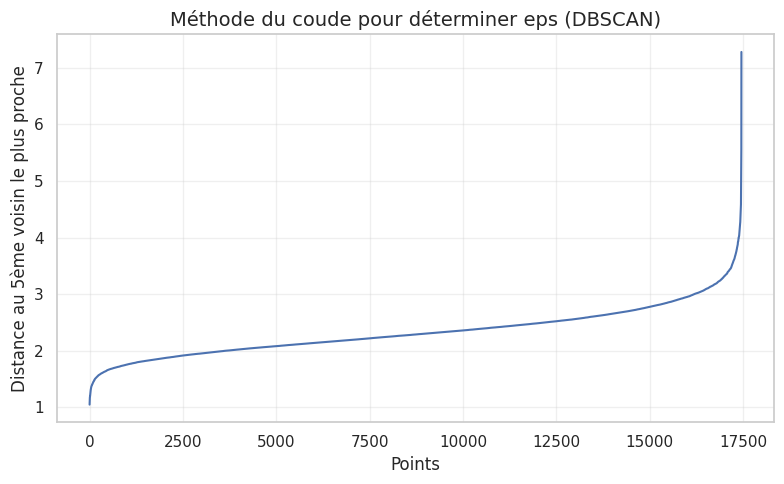

In [47]:
from sklearn.neighbors import NearestNeighbors

# Méthode du coude pour trouver eps optimal
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_final)
distances, indices = neighbors_fit.kneighbors(df_final)

distances_sorted = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances_sorted)
plt.xlabel('Points', fontsize=12)
plt.ylabel('Distance au 5ème voisin le plus proche', fontsize=12)
plt.title('Méthode du coude pour déterminer eps (DBSCAN)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Le graphique du coude montre la distance au 5eme voisin le plus proche pour chaque point, triée par ordre croissant. On observe une montée progressive suivie d’une cassure vers *3* à *4*, indiquant la transition entre les zones denses et les points isolés. Cette cassure correspond à la valeur optimale de `eps`, c’est-à-dire le rayon maximal à utiliser dans **DBSCAN** pour regrouper les points proches sans inclure trop de bruit. Ainsi, on peut conclure qu’un `eps` à environ *3.3* serait un bon choix initial pour identifier des clusters cohérents dans ce jeu de données.

#### Determination de eps optimal avec la méthode de la Silhouette

In [48]:
eps_values = [0.5, 1.5, 2.5, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4]
resultats_dbscan = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(df_final)
    
    n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    n_noise = list(labels_dbscan).count(-1)
    
    if n_clusters > 1:
        # Calculer silhouette en excluant le bruit
        mask_no_noise = labels_dbscan != -1
        if mask_no_noise.sum() > n_clusters:
            sil_score = silhouette_score(df_final[mask_no_noise], 
                                        labels_dbscan[mask_no_noise])
        else:
            sil_score = -1
    else:
        sil_score = -1
    
    resultats_dbscan.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette': sil_score,
        'labels': labels_dbscan
    })
    
    print(f"eps={eps}: {n_clusters} clusters, {n_noise} points de bruit, "
          f"silhouette={sil_score:.4f}")

eps=0.5: 0 clusters, 17455 points de bruit, silhouette=-1.0000
eps=1.5: 36 clusters, 17081 points de bruit, silhouette=0.2228
eps=2.5: 17 clusters, 2615 points de bruit, silhouette=-0.0471
eps=3.0: 5 clusters, 458 points de bruit, silhouette=0.1621
eps=3.1: 4 clusters, 329 points de bruit, silhouette=0.2913
eps=3.2: 4 clusters, 239 points de bruit, silhouette=0.2898
eps=3.3: 4 clusters, 171 points de bruit, silhouette=0.3920
eps=3.4: 4 clusters, 120 points de bruit, silhouette=0.3916
eps=3.5: 2 clusters, 99 points de bruit, silhouette=0.4173
eps=3.6: 1 clusters, 67 points de bruit, silhouette=-1.0000
eps=3.7: 1 clusters, 49 points de bruit, silhouette=-1.0000
eps=3.8: 1 clusters, 40 points de bruit, silhouette=-1.0000
eps=3.9: 1 clusters, 35 points de bruit, silhouette=-1.0000
eps=4: 1 clusters, 25 points de bruit, silhouette=-1.0000


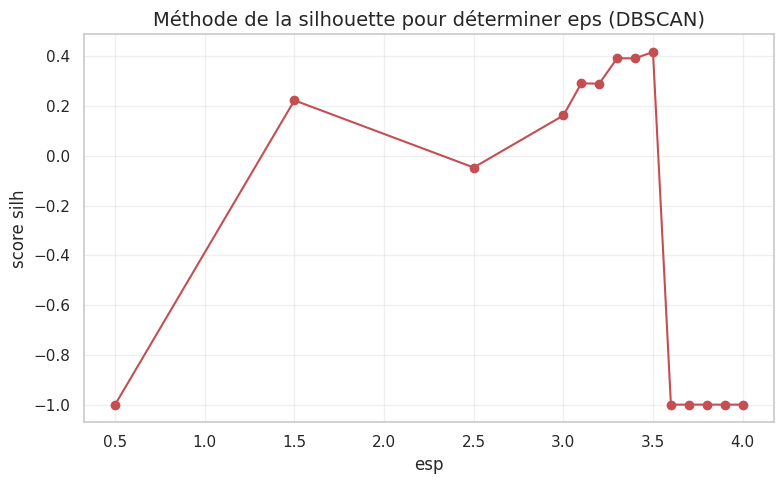

In [49]:
silhouettes = [res["silhouette"] for res in resultats_dbscan]
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouettes, "ro-")
plt.xlabel('esp', fontsize=12)
plt.ylabel('score silh', fontsize=12)
plt.title('Méthode de la silhouette pour déterminer eps (DBSCAN)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

La méthode de la **silhouette** montre que la qualité du regroupement est maximale pour des valeurs de `eps` comprises entre *3.3* et *3.5*, avec un score d’environ *0.39*. Au-delà, le modèle tend à regrouper la quasi-totalité des points dans un seul cluster, ce qui réduit fortement la pertinence du partitionnement. Ainsi, le meilleur compromis pour **DBSCAN** se situe autour de `eps = 3.4` et `min_samples = 5`, confirmant les résultats de la méthode du coude. Bien que le score **silhouette** soit légèrement supérieur pour `eps = 3.5`, la configuration avec `eps = 3.4` est préférable, car elle conserve une structure plus équilibrée avec quatre clusters distincts, contrairement à `eps = 3.5` où seuls deux clusters sont formés, ce qui serait trop simpliste malgré le bon score.

In [57]:
# Sélection du meilleur eps
best_dbscan = [dbscan_res for dbscan_res in resultats_dbscan if dbscan_res["eps"] == 3.4][0]
labels_dbscan_optimal = best_dbscan["labels"]

print(f"\nMeilleur DBSCAN: eps={best_dbscan['eps']}, "
      f"{best_dbscan['n_clusters']} clusters, "
      f"silhouette={best_dbscan['silhouette']:.4f}")


Meilleur DBSCAN: eps=3.4, 4 clusters, silhouette=0.3916


#### 2. CLUSTERING HIÉRARCHIQUE (WARD)

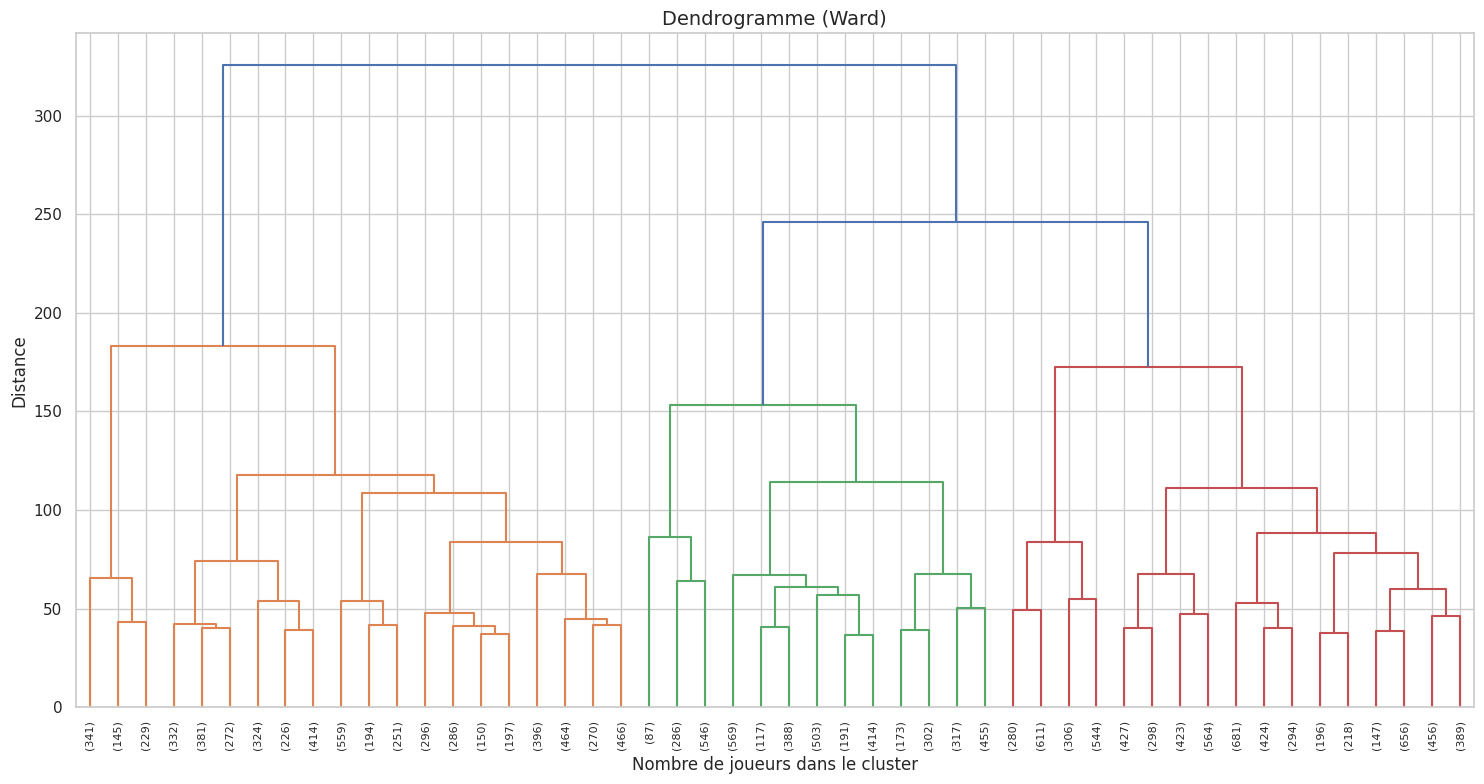

In [51]:
# Dendrogramme pour déterminer le nombre de clusters
linkage_matrix = linkage(df_final, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50)
plt.xlabel('Nombre de joueurs dans le cluster', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Dendrogramme (Ward)', fontsize=14)
plt.tight_layout()
plt.show()

Nous pouvons voir un saut net dans la hauteur des fusions entre environ *200* et *300* sur l’axe des distances.
Ce grand écart vertical suggère qu’en coupant le dendrogramme à ce niveau (autour de *240* de distance), on obtient trois grands clusters principaux visibles par les trois ensembles de couleurs (orange, vert, rouge).
En dessous de ce seuil, les branches sont plus courtes, indiquant des regroupements cohérents et proches.

In [52]:
# Test de différents nombres de clusters
silhouette_ward = []
k_range_ward = range(2, 7)

for k in k_range_ward:
    ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_ward = ward.fit_predict(df_final)
    sil_score = silhouette_score(df_final, labels_ward)
    silhouette_ward.append(sil_score)
    print(f"k={k}: silhouette={sil_score:.4f}")

k=2: silhouette=0.1280
k=3: silhouette=0.0983
k=4: silhouette=0.0977
k=5: silhouette=0.0918
k=6: silhouette=0.0921


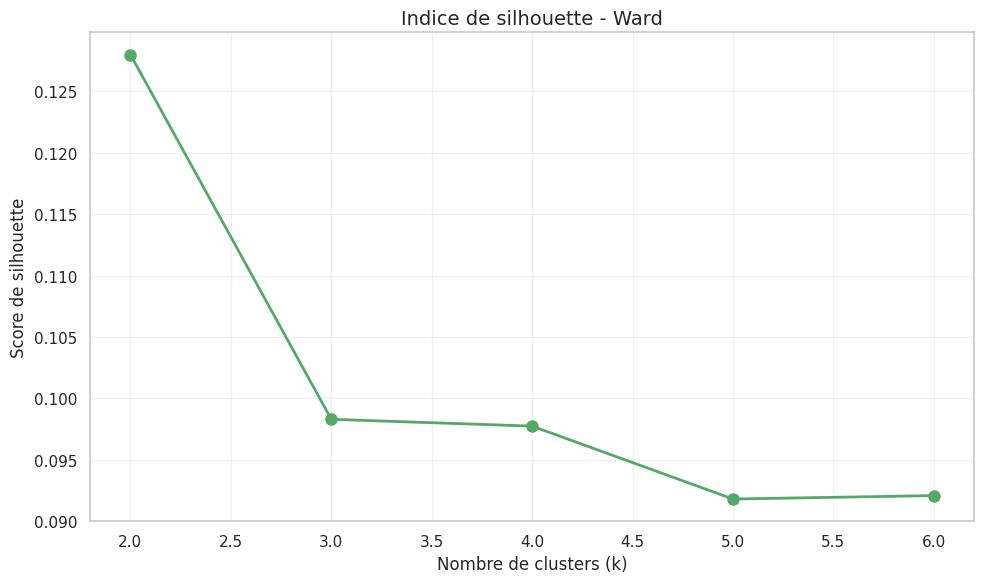

In [53]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(k_range_ward, silhouette_ward, 'go-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Score de silhouette', fontsize=12)
plt.title('Indice de silhouette - Ward', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Nous observons quasiment le même phénomène que celui observer sur le **K-means**, nous avons un méilleur indice de silhouette pour *k=2* mais encore ça reste très simpliste. Le nombre de cluster optimal après *k=2* c'est donc *k=3*

In [54]:
# K optimal pour Ward
k_ward_optimal = 3
ward_optimal = AgglomerativeClustering(n_clusters=k_ward_optimal, linkage='ward')
labels_ward_optimal = ward_optimal.fit_predict(df_final)

print(f"\nK optimal (Ward): {k_ward_optimal}")
print(f"Silhouette: {max(silhouette_ward):.4f}")


K optimal (Ward): 3
Silhouette: 0.1280


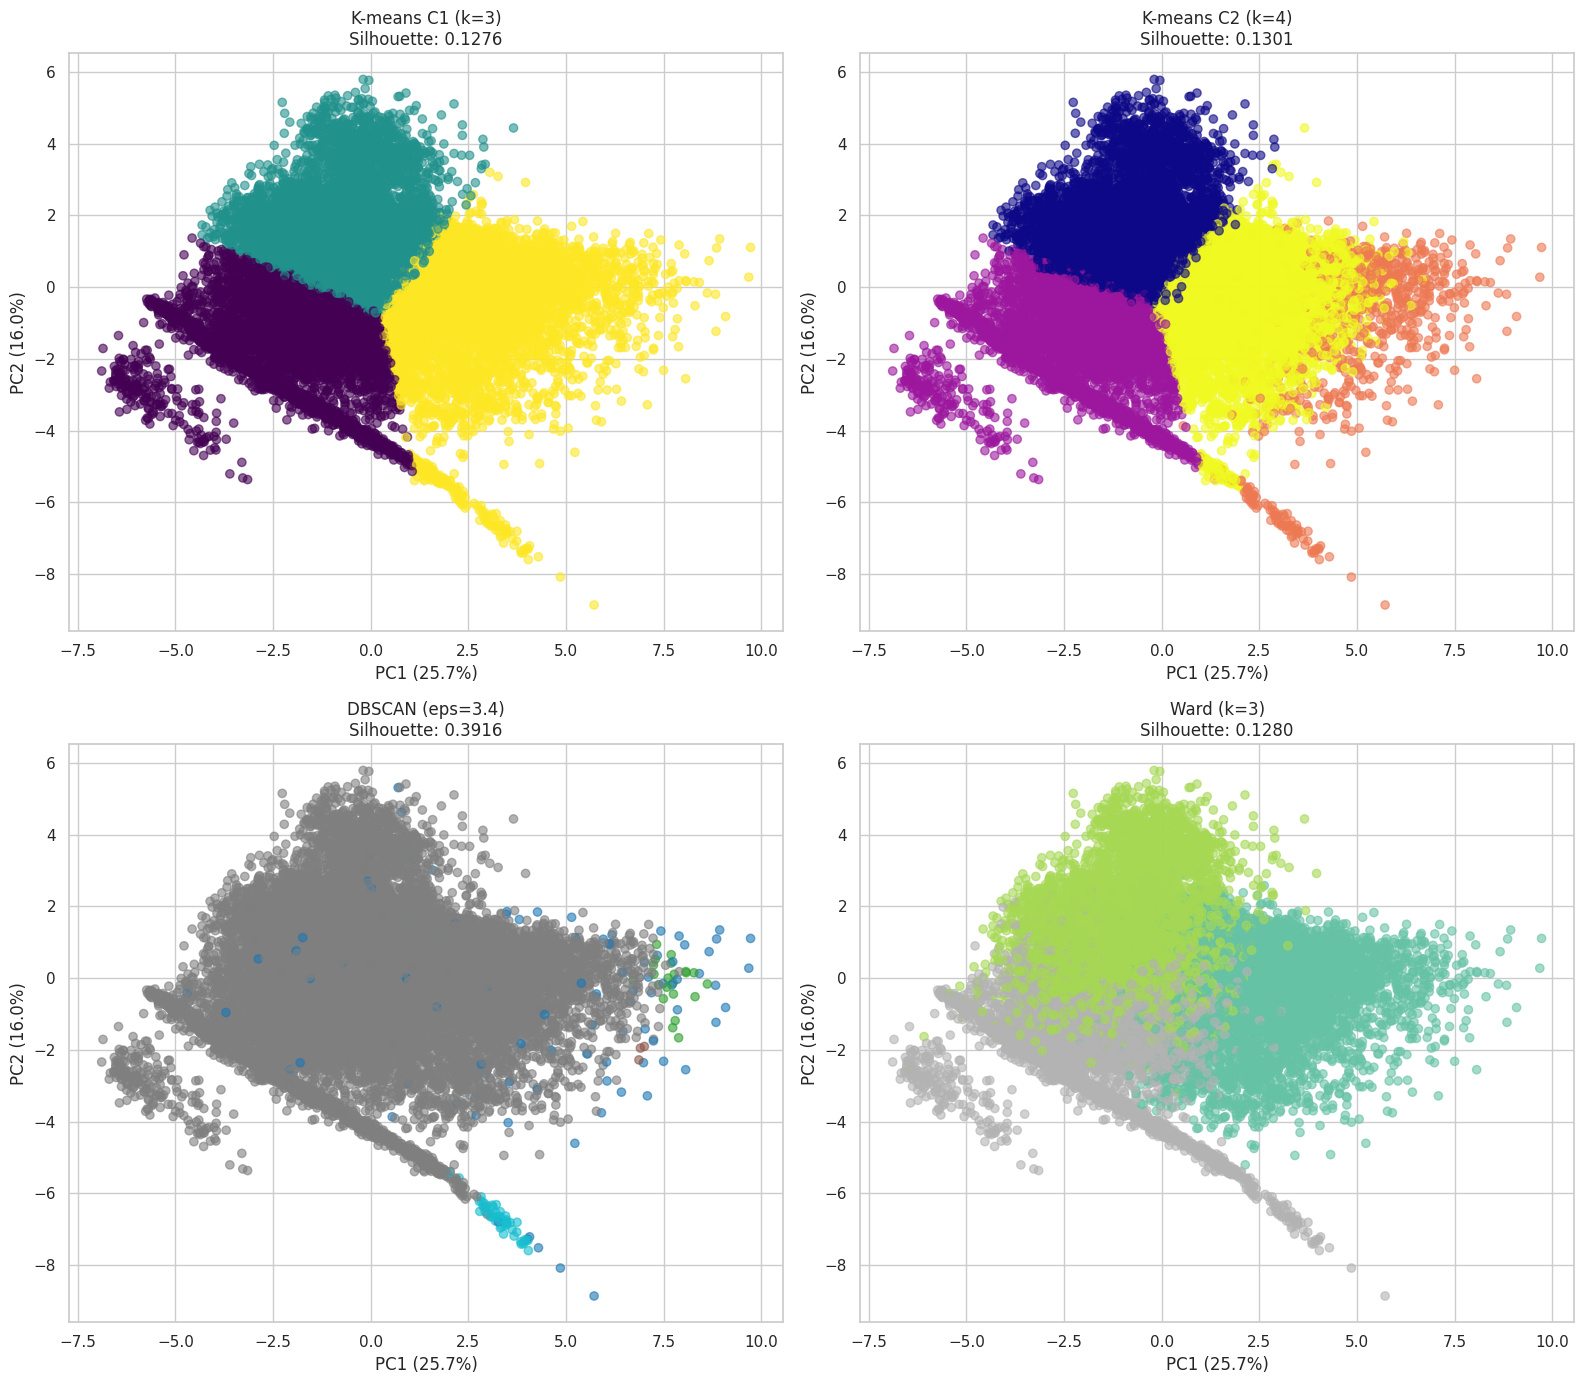

In [58]:
# COMPARAISON DES ALGORITHMES
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# K-means C1
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=C1, cmap='viridis', alpha=0.6)
axes[0, 0].set_title(f'K-means C1 (k={k_coude})\nSilhouette: {silhouette_score(df_final, C1):.4f}')

# K-means C2
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=C2, cmap='plasma', alpha=0.6)
axes[0, 1].set_title(f'K-means C2 (k={k_silhouette})\nSilhouette: {silhouette_score(df_final, C2):.4f}')

# DBSCAN
axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan_optimal, cmap='tab10', alpha=0.6)
axes[1, 0].set_title(f'DBSCAN (eps={best_dbscan["eps"]})\nSilhouette: {best_dbscan["silhouette"]:.4f}')

# Ward
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ward_optimal, cmap='Set2', alpha=0.6)
axes[1, 1].set_title(f'Ward (k={k_ward_optimal})\nSilhouette: {max(silhouette_ward):.4f}')

for ax in axes.flat:
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

plt.tight_layout()
plt.show()

In [59]:
# Tableau comparatif
print("\nRÉSUMÉ COMPARATIF:")
print("-" * 80)
print(f"{'Algorithme':<20} {'Nb clusters':<15} {'Silhouette':<15} {'Observations'}")
print("-" * 80)
print(f"{'K-means (coude)':<20} {k_coude:<15} {silhouette_score(df_final, C1):<15.4f}")
print(f"{'K-means (silhouette)':<20} {k_silhouette:<15} {silhouette_score(df_final, C2):<15.4f}")
print(f"{'DBSCAN':<20} {best_dbscan['n_clusters']:<15} {best_dbscan['silhouette']:<15.4f} {best_dbscan['n_noise']} pts bruit")
print(f"{'Ward':<20} {k_ward_optimal:<15} {max(silhouette_ward):<15.4f}")
print("-" * 80)


RÉSUMÉ COMPARATIF:
--------------------------------------------------------------------------------
Algorithme           Nb clusters     Silhouette      Observations
--------------------------------------------------------------------------------
K-means (coude)      3               0.1276         
K-means (silhouette) 4               0.1301         
DBSCAN               4               0.3916          120 pts bruit
Ward                 3               0.1280         
--------------------------------------------------------------------------------


## 2.2 Indices de validité du clustering

In [60]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
k_range = range(2, 10)

#### K-means et Ward

In [61]:
resultats_kmeans = {'CH': [], 'DB': [], 'Silhouette': []}
resultats_ward = {'CH': [], 'DB': [], 'Silhouette': []}
print("\n--- ÉVALUATION K-MEANS ---")
for k in k_range:
    ch_scores = []
    db_scores = []
    sil_scores = []
    
    for execution in range(n_executions):
        kmeans = KMeans(n_clusters=k, random_state=execution, n_init=10, max_iter=300)
        labels = kmeans.fit_predict(df_final)
        
        ch_scores.append(calinski_harabasz_score(df_final, labels))
        db_scores.append(davies_bouldin_score(df_final, labels))
        sil_scores.append(silhouette_score(df_final, labels))
    
    resultats_kmeans['CH'].append(np.mean(ch_scores))
    resultats_kmeans['DB'].append(np.mean(db_scores))
    resultats_kmeans['Silhouette'].append(np.mean(sil_scores))
    
    print(f"k={k:2d}: CH={np.mean(ch_scores):8.2f}, DB={np.mean(db_scores):.4f}, Sil={np.mean(sil_scores):.4f}")

print("\n--- ÉVALUATION WARD ---")
for k in k_range:
    ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = ward.fit_predict(df_final)
    
    ch_score = calinski_harabasz_score(df_final, labels)
    db_score = davies_bouldin_score(df_final, labels)
    sil_score = silhouette_score(df_final, labels)
    
    resultats_ward['CH'].append(ch_score)
    resultats_ward['DB'].append(db_score)
    resultats_ward['Silhouette'].append(sil_score)
    
    print(f"k={k:2d}: CH={ch_score:8.2f}, DB={db_score:.4f}, Sil={sil_score:.4f}")



--- ÉVALUATION K-MEANS ---
k= 2: CH= 3548.01, DB=2.0960, Sil=0.1629
k= 3: CH= 2956.96, DB=2.1304, Sil=0.1276
k= 4: CH= 2450.48, DB=2.0352, Sil=0.1278
k= 5: CH= 2182.87, DB=2.0141, Sil=0.1162
k= 6: CH= 2035.02, DB=2.0432, Sil=0.1186
k= 7: CH= 1888.60, DB=2.0780, Sil=0.1114
k= 8: CH= 1754.27, DB=2.0726, Sil=0.1146
k= 9: CH= 1638.44, DB=2.1254, Sil=0.1078

--- ÉVALUATION WARD ---
k= 2: CH= 2706.85, DB=2.3396, Sil=0.1280
k= 3: CH= 2333.63, DB=2.3595, Sil=0.0983
k= 4: CH= 1974.62, DB=2.2039, Sil=0.0977
k= 5: CH= 1791.81, DB=2.2886, Sil=0.0918
k= 6: CH= 1648.47, DB=2.2925, Sil=0.0921
k= 7: CH= 1487.46, DB=2.5562, Sil=0.0672
k= 8: CH= 1371.34, DB=2.5792, Sil=0.0605
k= 9: CH= 1283.80, DB=2.5970, Sil=0.0579


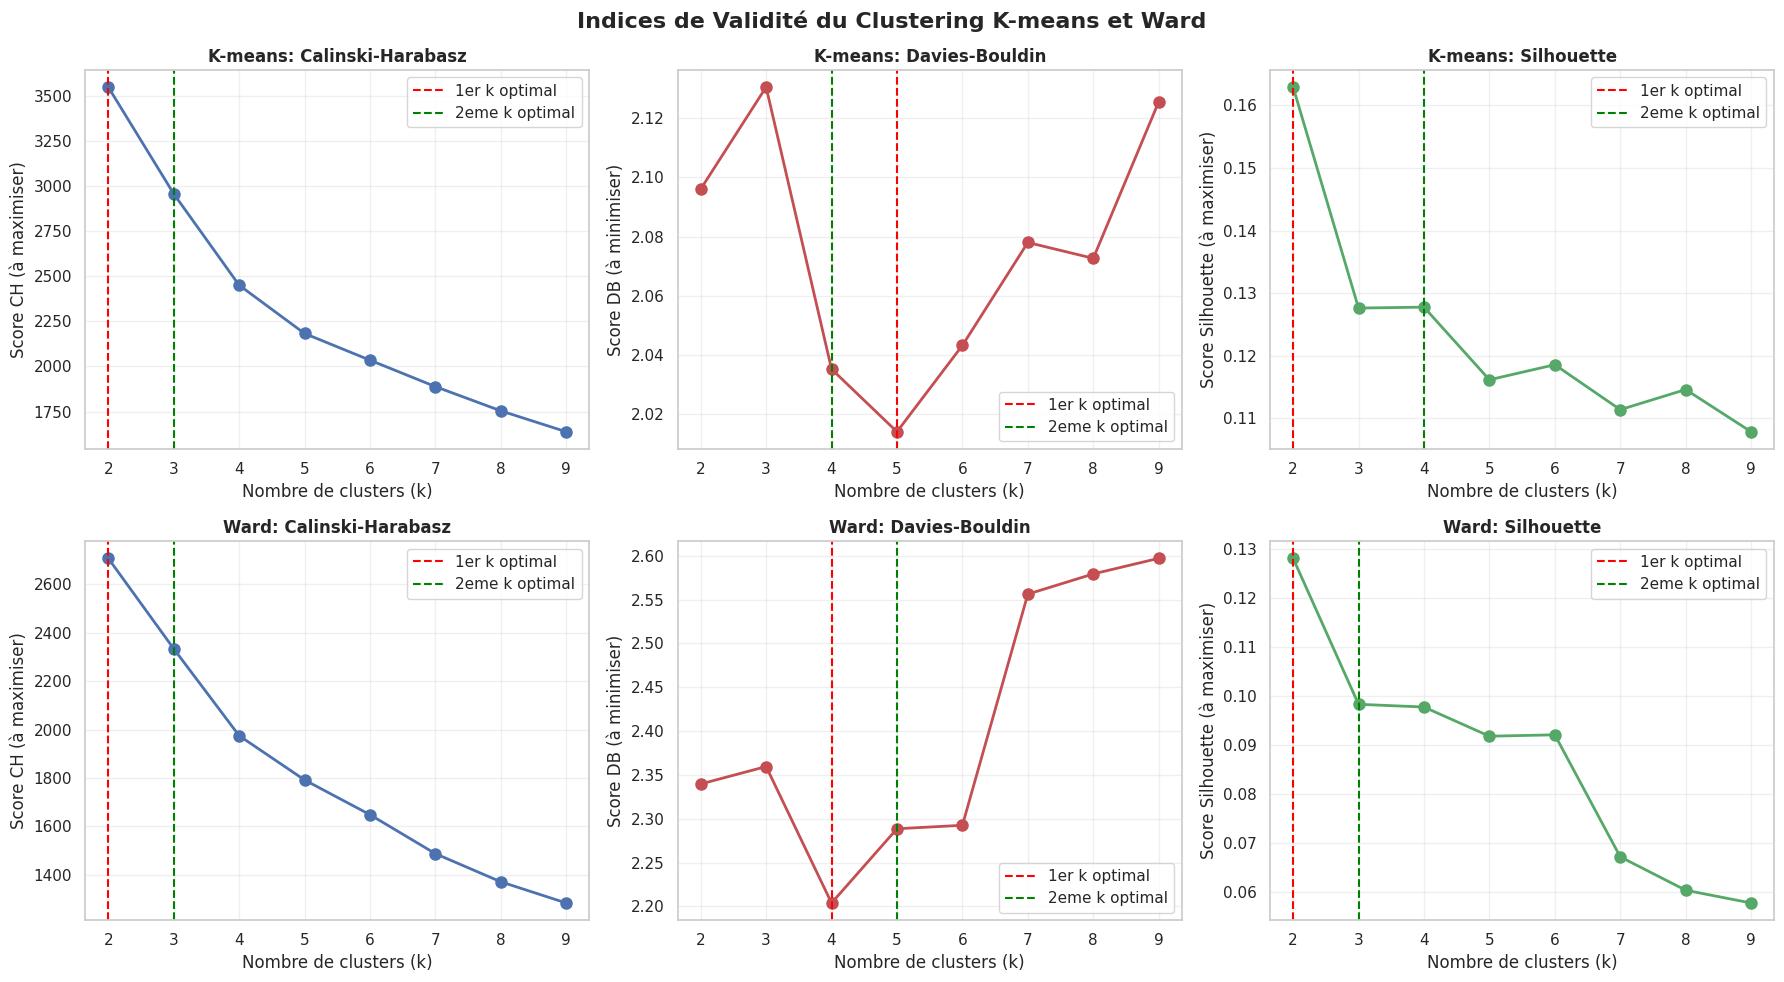

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Indices de Validité du Clustering K-means et Ward', fontsize=16, fontweight='bold')

# K-means - Calinski-Harabasz
axes[0, 0].plot(k_range, resultats_kmeans['CH'], 'bo-', linewidth=2, markersize=8)
axes[0, 0].axvline(2, color='red', linestyle='--', label=f'1er k optimal')
axes[0, 0].axvline(3, color='green', linestyle='--', label=f'2eme k optimal')
axes[0, 0].set_title('K-means: Calinski-Harabasz', fontweight='bold')
axes[0, 0].set_xlabel('Nombre de clusters (k)')
axes[0, 0].set_ylabel('Score CH (à maximiser)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# K-means - Davies-Bouldin
axes[0, 1].plot(k_range, resultats_kmeans['DB'], 'ro-', linewidth=2, markersize=8)
axes[0, 1].axvline(5, color='red', linestyle='--', label=f'1er k optimal')
axes[0, 1].axvline(4, color='green', linestyle='--', label=f'2eme k optimal')
axes[0, 1].set_title('K-means: Davies-Bouldin', fontweight='bold')
axes[0, 1].set_xlabel('Nombre de clusters (k)')
axes[0, 1].set_ylabel('Score DB (à minimiser)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# K-means - Silhouette
axes[0, 2].plot(k_range, resultats_kmeans['Silhouette'], 'go-', linewidth=2, markersize=8)
axes[0, 2].axvline(2, color='red', linestyle='--', label=f'1er k optimal')
axes[0, 2].axvline(4, color='green', linestyle='--', label=f'2eme k optimal')
axes[0, 2].set_title('K-means: Silhouette', fontweight='bold')
axes[0, 2].set_xlabel('Nombre de clusters (k)')
axes[0, 2].set_ylabel('Score Silhouette (à maximiser)')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Ward - Calinski-Harabasz
axes[1, 0].plot(k_range, resultats_ward['CH'], 'bo-', linewidth=2, markersize=8)
axes[1, 0].axvline(2, color='red', linestyle='--', label=f'1er k optimal')
axes[1, 0].axvline(3, color='green', linestyle='--', label=f'2eme k optimal')
axes[1, 0].set_title('Ward: Calinski-Harabasz', fontweight='bold')
axes[1, 0].set_xlabel('Nombre de clusters (k)')
axes[1, 0].set_ylabel('Score CH (à maximiser)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Ward - Davies-Bouldin
axes[1, 1].plot(k_range, resultats_ward['DB'], 'ro-', linewidth=2, markersize=8)
axes[1, 1].axvline(4, color='red', linestyle='--', label=f'1er k optimal ')
axes[1, 1].axvline(5, color='green', linestyle='--', label=f'2eme k optimal')
axes[1, 1].set_title('Ward: Davies-Bouldin', fontweight='bold')
axes[1, 1].set_xlabel('Nombre de clusters (k)')
axes[1, 1].set_ylabel('Score DB (à minimiser)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Ward - Silhouette
axes[1, 2].plot(k_range, resultats_ward['Silhouette'], 'go-', linewidth=2, markersize=8)
axes[1, 2].axvline(2, color='red', linestyle='--', label=f'1er k optimal')
axes[1, 2].axvline(3, color='green', linestyle='--', label=f'2eme k optimal')
axes[1, 2].set_title('Ward: Silhouette', fontweight='bold')
axes[1, 2].set_xlabel('Nombre de clusters (k)')
axes[1, 2].set_ylabel('Score Silhouette (à maximiser)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### DBSCAN

In [63]:
eps_values = [0.5, 1.0, 1.5, 2.5, 3.0, 3.1,3.2,3.3,3.4,3.5]
min_samples_values = [3, 5, 10]

resultats_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_final)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1 and n_noise < len(labels) * 0.5:
            mask_no_noise = labels != -1
            
            if mask_no_noise.sum() > n_clusters:
                ch_score = calinski_harabasz_score(df_final[mask_no_noise], labels[mask_no_noise])
                db_score = davies_bouldin_score(df_final[mask_no_noise], labels[mask_no_noise])
                sil_score = silhouette_score(df_final[mask_no_noise], labels[mask_no_noise])
                
                resultats_dbscan.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'pct_noise': n_noise / len(labels) * 100,
                    'CH': ch_score,
                    'DB': db_score,
                    'Silhouette': sil_score
                })

if resultats_dbscan:
    print(f"\n{'eps':<6} {'min_s':<7} {'clusters':<10} {'bruit':<10} {'CH':<10} {'DB':<10} {'Sil':<10}")
    print("-" * 73)
    for res in resultats_dbscan:
        print(f"{res['eps']:<6.1f} {res['min_samples']:<7} {res['n_clusters']:<10} "
              f"{res['n_noise']:<10} {res['CH']:<10.2f} {res['DB']:<10.4f} {res['Silhouette']:<10.4f}")
    


eps    min_s   clusters   bruit      CH         DB         Sil       
-------------------------------------------------------------------------
2.5    3       34         2184       25.63      1.4639     -0.1923   
2.5    5       17         2615       28.01      1.3309     -0.0471   
2.5    10      2          3577       2.70       1.0814     0.0775    
3.0    3       7          397        167.72     1.4680     0.1705    
3.0    5       5          458        228.75     1.2965     0.1621    
3.0    10      4          601        256.27     1.2947     0.2715    
3.1    3       6          283        73.90      1.5148     0.2628    
3.1    5       4          329        101.99     1.2464     0.2913    
3.1    10      3          417        113.20     1.3574     0.2968    
3.2    3       4          218        130.22     1.2959     0.2899    
3.2    5       4          239        117.60     1.2786     0.2898    
3.2    10      3          302        127.56     1.4116     0.2933    
3.3    3       

In [64]:
df_results = pd.DataFrame(resultats_dbscan)

metrics = ['CH', 'DB', 'Silhouette']
metric_labels = {
    'CH': 'Calinski-Harabasz Score',
    'DB': 'Davies-Bouldin Score',
    'Silhouette': 'Silhouette Score'
}

# Fonction pour trouver les eps optimaux selon la métrique
def find_optimal_eps(df_results, min_samples_val, metric):
    subset = df_results[df_results['min_samples'] == min_samples_val].copy()
    
    if len(subset) == 0:
        return None, None
    
    if metric == 'DB':
        # Pour DB, on cherche le minimum
        sorted_subset = subset.sort_values(metric, ascending=True)
    else:
        # Pour CH et Silhouette, on cherche le maximum
        sorted_subset = subset.sort_values(metric, ascending=False)
    
    # Premier optimal 
    eps_optimal_1 = sorted_subset.iloc[0]['eps']
    
    # Deuxième optimal
    eps_optimal_2 = sorted_subset.iloc[1]['eps']
    
    return eps_optimal_1, eps_optimal_2

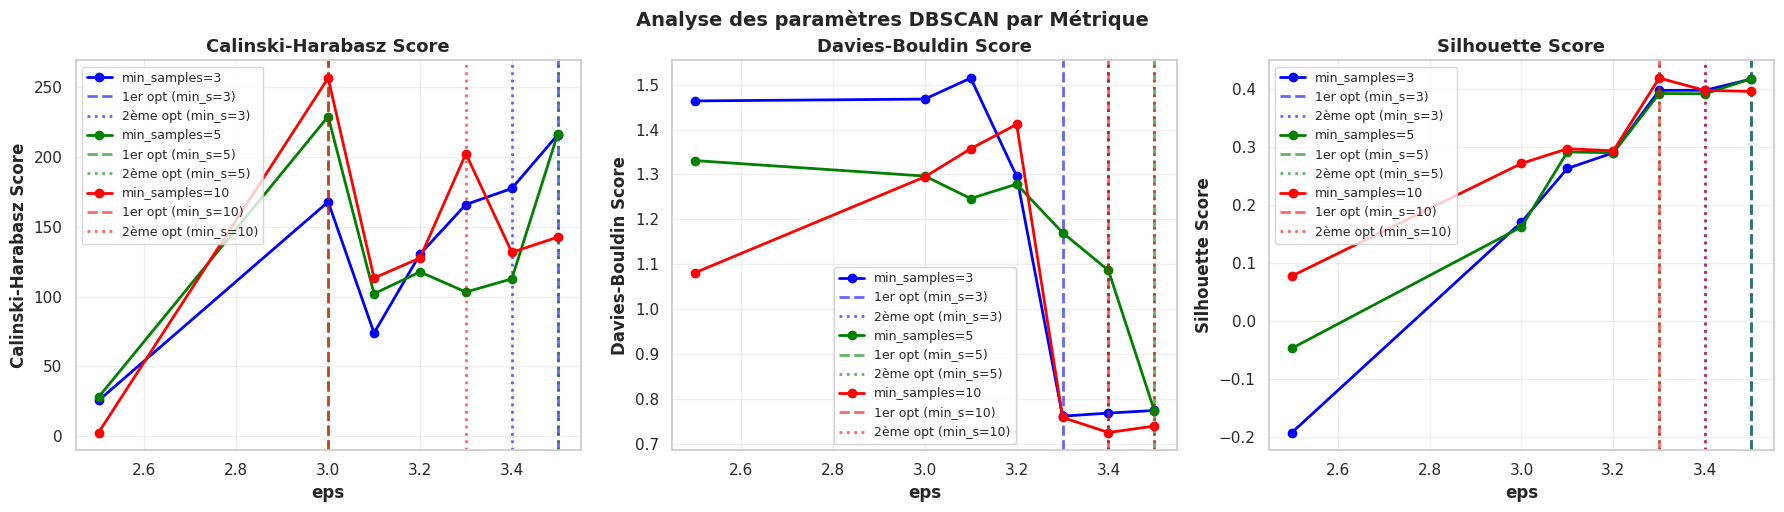

In [65]:
colors = {3: 'blue', 5: 'green', 10: 'red'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    for min_samples_val in min_samples_values:
        # Filtrer les données pour ce min_samples
        subset = df_results[df_results['min_samples'] == min_samples_val]
        
        if len(subset) > 0:
            # Tracer la courbe
            ax.plot(subset['eps'], subset[metric], 
                   marker='o', label=f'min_samples={min_samples_val}',
                   color=colors[min_samples_val], linewidth=2, markersize=6)
            
            # Trouver et tracer les eps optimaux pour cette métrique
            eps_opt_1, eps_opt_2 = find_optimal_eps(df_results, min_samples_val, metric)
            
            if eps_opt_1 is not None:
                ax.axvline(x=eps_opt_1, color=colors[min_samples_val], 
                          linestyle='--', alpha=0.6, linewidth=2,
                          label=f'1er opt (min_s={min_samples_val})')
            
            if eps_opt_2 is not None and eps_opt_2 != eps_opt_1:
                ax.axvline(x=eps_opt_2, color=colors[min_samples_val], 
                          linestyle=':', alpha=0.6, linewidth=2,
                          label=f'2ème opt (min_s={min_samples_val})')
    
    ax.set_xlabel('eps', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric_labels[metric], fontsize=12, fontweight='bold')
    ax.set_title(metric_labels[metric], fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Analyse des paramètres DBSCAN par Métrique', fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [66]:
print("\n" + "="*70)
print("EPS OPTIMAUX PAR MÉTRIQUE ET MIN_SAMPLES")
print("="*70)
for metric in metrics:
    print(f"\n{metric_labels[metric]}:")
    for min_samples_val in min_samples_values:
        eps_opt_1, eps_opt_2 = find_optimal_eps(df_results, min_samples_val, metric)
        print(f"  min_samples={min_samples_val}: 1er={eps_opt_1}, 2ème={eps_opt_2}")


EPS OPTIMAUX PAR MÉTRIQUE ET MIN_SAMPLES

Calinski-Harabasz Score:
  min_samples=3: 1er=3.5, 2ème=3.4
  min_samples=5: 1er=3.0, 2ème=3.5
  min_samples=10: 1er=3.0, 2ème=3.3

Davies-Bouldin Score:
  min_samples=3: 1er=3.3, 2ème=3.4
  min_samples=5: 1er=3.5, 2ème=3.4
  min_samples=10: 1er=3.4, 2ème=3.5

Silhouette Score:
  min_samples=3: 1er=3.5, 2ème=3.4
  min_samples=5: 1er=3.5, 2ème=3.3
  min_samples=10: 1er=3.3, 2ème=3.4
